# Australia Weather Analysis and Prediction

##### Author: Vincent Yeo

#### Background
Bushfires are [common](https://www.bbc.com/news/world-australia-50951043) in Australia during dry season. However, very low rainfalls can lead to disaster. Started in [November 2019](https://www.theguardian.com/australia-news/2019/nov/22/australia-bushfires-factcheck-are-this-years-fires-unprecedented), Australia has experienced a severe continent-wide bushfires that has resulted in the loss of at least 5 million hectares of land, over 2,500 buildings and 19 people. Such extreme weathers also affects the local biodiversity, the quality of the air and water and the argiculture there. Thus, weather forecasting plays a major role in Australia in predicting potential weather disaster beforehand. 

With the prediction, we can identify the next critical periods whereby the low rainfall level are likely to increase the chance of bushfires occurences happening. This can better assist government decision in allocating resources before potential weather-caused crisis can happen. 


#### Weather dataset
This is a public weather dataset adapted from:
[Ledolter, J. (May 2013). Data Mining and Business Analytics with R. US: Wiley. ISBN: 978-1-118-44714-7](https://www.wiley.com/en-sg/Data+Mining+and+Business+Analytics+with+R-p-9781118447147)

The Dataset contains a one-year weather data by Canberra's weather station from 2007-2008. Canberra is Australia's capital city at the southeast of the continent. Here is an example of the [Weather map of Canberra](https://www.meteoblue.com/en/weather-maps/canberra_australia_2172517?variable=precipitation3h_cloudcover_pressure&level=surface&lines=none&mapcenter=-35.3481N148.9110&zoom=10)

#### Tasks:
Given the variables:

+ To predict whether will it rain tomorrow.
+ To predict how much rainfall the next day.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings 

warnings.filterwarnings('ignore')

In [2]:
data_dir = os.getcwd() + "/data/weather.csv"

weather_df = pd.read_csv(data_dir, index_col=0, parse_dates=True)
weather_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                      
2007-11-01  Canberra      8.0     24.3       0.0          3.4       6.3   
2007-11-02  Canberra     14.0     26.9       3.6          4.4       9.7   
2007-11-03  Canberra     13.7     23.4       3.6          5.8       3.3   
2007-11-04  Canberra     13.3     15.5      39.8          7.2       9.1   
2007-11-05  Canberra      7.6     16.1       2.8          5.6      10.6   
...              ...      ...      ...       ...          ...       ...   
2008-10-27  Canberra      9.0     30.7       0.0          7.6      12.1   
2008-10-28  Canberra      7.1     28.4       0.0         11.6      12.7   
2008-10-29  Canberra     12.5     19.9       0.0          8.4       5.3   
2008-10-30  Canberra     12.5     26.9       0.0          5.0       7.1   
2008-10-31  Canberra     12.3     30.2       0.0          6.0      12.6   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity3pm  \
Date                                                         ...                
2007-11-01          NW           30.0         SW         NW  ...           29   
2007-11-02         ENE           39.0          E          W  ...           36   
2007-11-03          NW           85.0          N        NNE  ...           69   
2007-11-04          NW           54.0        WNW          W  ...           56   
2007-11-05         SSE           50.0        SSE        ESE  ...           49   
...                ...            ...        ...        ...  ...          ...   
2008-10-27         NNW           76.0        SSE         NW  ...           15   
2008-10-28           N           48.0        NNW        NNW  ...           22   
2008-10-29         ESE           43.0        ENE        ENE  ...           47   
2008-10-30          NW           46.0        SSW        WNW  ...           39   
2008-10-31          NW           78.0         NW        WNW  ...           13   

            Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
Date                                                                         
2007-11-01       1019.7       1015.0         7         7     14.4     23.6   
2007-11-02       1012.4       1008.4         5         3     17.5     25.7   
2007-11-03       1009.5       1007.2         8         7     15.4     20.2   
2007-11-04       1005.5       1007.0         2         7     13.5     14.1   
2007-11-05       1018.3       1018.5         7         7     11.1     15.4   
...                 ...          ...       ...       ...      ...      ...   
2008-10-27       1016.1       1010.8         1         3     20.4     30.0   
2008-10-28       1020.0       1016.9         0         1     17.2     28.2   
2008-10-29       1024.0       1022.8         3         2     14.5     18.3   
2008-10-30       1021.0       1016.2         6         7     15.8     25.9   
2008-10-31       1009.6       1009.2         1         1     23.8     28.6   

            RainToday  RISK_MM  RainTomorrow  
Date                                          
2007-11-01         No      3.6           Yes  
2007-11-02        Yes      3.6           Yes  
2007-11-03        Yes     39.8           Yes  
2007-11-04        Yes      2.8           Yes  
2007-11-05        Yes      0.0            No  
...               ...      ...           ...  
2008-10-27         No      0.0            No  
2008-10-28         No      0.0            No  
2008-10-29         No      0.0            No  
2008-10-30         No      0.0            No  
2008-10-31         No      0.0            No  

[366 rows x 23 columns]

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 23 columns):
Location         366 non-null object
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12

There are 366 observations and 23 columns as follows:

| Variable | Description |
|----------|-------------|
|Date |The date of observation.
|Location| The common name of the location of the weather station.
MinTemp| The minimum temperature in degrees centigrade.
MaxTemp| The maximum temperature in degrees centigrade.
Rainfall| The amount of rainfall recorded for the day in millimeters. 
Evaporation| Class A pan evaporation (in millimeters) during 24 h (until 9 a.m.). 
Sunshine| The number of hours of bright sunshine in the day.
WindGustDir| The direction of the strongest wind gust in the 24 h to midnight. 
WindGustSpeed| The speed (in kilometers per hour) of the strongest wind gust in the 24 h to midnight.
WindDir9am| The direction of the wind gust at 9 a.m.
WindDir3pm| The direction of the wind gust at 3 p.m.
WindSpeed9am| Wind speed (in kilometers per hour) averaged over 10min before 9 a.m.
WindSpeed3pm| Wind speed (in kilometers per hour) averaged over 10min before 3 p.m.
RelHumid9am| Relative humidity (in percent) at 9 am.
RelHumid3pm| Relative humidity (in percent) at 3 p.m.
Pressure9am| Atmospheric pressure (hpa) reduced to mean sea level at 9 a.m. 
Pressure3pm| Atmospheric pressure (hpa) reduced to mean sea level at 3 p.m. 
Cloud9am| Fraction of sky obscured by cloud at 9 a.m. This is measured in ”oktas,” which are a unit of eighths. It records how many eighths of the sky are obscured by cloud. A 0 measure indicates completely clear sky, while an 8 indicates that it is completely overcast.
Cloud3pm| Fraction of sky obscured by cloud at 3 p.m; see Cloud9am for a description of the values.
Temp9am| Temperature (degrees C) at 9 a.m. 
Temp3pm | Temperature (degrees C) at 3 p.m.
RainToday| Integer 1 if precipitation (in millimeters) in the 24 h to 9 a.m. exceeds 1 mm, otherwise 0.
RISK_MM| The continuous target variable; the amount of rain recorded during the next day.
RainTomorrow| The binary target variable whether it rains or not during the next day.



In [4]:
weather_df['Location'].value_counts()

Canberra    366
Name: Location, dtype: int64

We will drop variables `Location` since `Location` contains only 'Canberra'. This dataset contains a historical weather data captured by Canberra's weather station. So we are working with time-series daat and will convert `Date` into the relevant data type

In [5]:
df = weather_df.drop(['Location'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      363 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       365 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(5)
memory usage: 

In [6]:
# Find Out which features have missing values
# df.isnull().sum() > 0

# Find out how many actual missing values
print(df.isnull().sum())
print()

# Find out percentage of missing values
print(df.isnull().sum()/len(df)*100)

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.819672
WindGustDir      0.819672
WindGustSpeed    0.546448
WindDir9am       8.469945
WindDir3pm       0.273224
WindSpeed9am     1.912568
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        0.000000
RISK_MM          0.000000


There are some features with missing values:
+ `Sunshine`      
+ `WindGustDir`  
+ `WindGustSpeed`   
+ `WindDir9am`
+ `WindDir3pm`
+ `WindSpeed9am`

`WindDir9am` has 31 missing observations (about 8.5% of the total observations) while the rest of the other variables have minimal missing observations

Since cateogrical variables `WindGustDir` and `WindDir3pm` has 3 and 1 missing values, we will impute the mode of each variable for the missing data.

#### Fix Missing Categorical Data by Imputation of Mode

In [7]:
# observe how windgustdir relate to both windgustdir9am and 3pm
df[['WindGustDir', 'WindDir9am', 'WindDir3pm']]
# There is no clear pattern here
# So we can either use WindGustDir or the Feature Engg of WindDir9am and WindDir3pm

WindGustDir WindDir9am WindDir3pm
Date                                        
2007-11-01          NW         SW         NW
2007-11-02         ENE          E          W
2007-11-03          NW          N        NNE
2007-11-04          NW        WNW          W
2007-11-05         SSE        SSE        ESE
...                ...        ...        ...
2008-10-27         NNW        SSE         NW
2008-10-28           N        NNW        NNW
2008-10-29         ESE        ENE        ENE
2008-10-30          NW        SSW        WNW
2008-10-31          NW         NW        WNW

[366 rows x 3 columns]

In [8]:
print(df['WindGustDir'].value_counts())
df['WindGustDir'].fillna('NW', inplace=True) # Mode is NW
print()
print(df['WindDir3pm'].value_counts())
df['WindDir3pm'].fillna('NW', inplace=True) #Mode is NW and WNW
print()
df.info()

NW     73
NNW    44
E      37
WNW    35
ENE    30
ESE    23
S      22
N      21
W      20
NE     16
SE     12
SSE    12
NNE     8
SSW     5
SW      3
WSW     2
Name: WindGustDir, dtype: int64

NW     61
WNW    61
NNW    47
N      30
ESE    27
W      26
E      17
NE     15
S      14
NNE    14
ENE    13
SE     12
WSW    11
SSE     7
SSW     6
SW      4
Name: WindDir3pm, dtype: int64

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 22 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         363 non-null float64
WindGustDir      366 non-null object
WindGustSpeed    364 non-null float64
WindDir9am       335 non-null object
WindDir3pm       366 non-null object
WindSpeed9am     359 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressu

Given the large percentage of missing values of WindDir9am, We move on to analyse the categorical variables first

In [9]:
# Names of all the categorical predictors
cat_predictors = df.select_dtypes(include='object')
cat_predictors.drop(["RainTomorrow"], axis=1, inplace=True)
print(cat_predictors.head())
cat_predictors = cat_predictors.columns
cat_predictors

           WindGustDir WindDir9am WindDir3pm RainToday
Date                                                  
2007-11-01          NW         SW         NW        No
2007-11-02         ENE          E          W       Yes
2007-11-03          NW          N        NNE       Yes
2007-11-04          NW        WNW          W       Yes
2007-11-05         SSE        SSE        ESE       Yes


Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

We can apply **Chi-square** test to examine whether if any of these categorical variables have any relationship with `RainTomorrow.`

The hypotheses for the Chi-square test are as follows:

+ `H0` -  Variables are independent of each other
+ `H1` - Variables are not independent of each other

We will keep those predictors that have relationship with the target variable `RainTomorrow`

In [10]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def findChiSquare(table):
    stat, p, dof, expected = chi2_contingency(table)
    print('stat=%.3f, p=%.3f' % (stat, p))

    # interpret test-statistic
    prob = 0.95

    # interpret p-value
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p > alpha:
        return True
    else: 
        return False

In [11]:
# For each categorical predictor, run the chi-square test with the categorical target variable RainTomorrow
independent_predictors = []

for col in df[cat_predictors]:
    # do pivot table with target
    print("\nChi-Square Test Statistics for " + col)
    table = pd.pivot_table(df, index = "RainTomorrow", columns = col, aggfunc={col: len}, fill_value=0)
    if findChiSquare(table) == True:
        independent_predictors.append(col)
        print(col + ' is independent of RainTomorrow')

print("\n\n The Independent Variables are: ")        
independent_predictors     


Chi-Square Test Statistics for WindGustDir
stat=26.543, p=0.033
significance=0.050, p=0.033

Chi-Square Test Statistics for WindDir9am
stat=23.597, p=0.072
significance=0.050, p=0.072
WindDir9am is independent of RainTomorrow

Chi-Square Test Statistics for WindDir3pm
stat=8.937, p=0.881
significance=0.050, p=0.881
WindDir3pm is independent of RainTomorrow

Chi-Square Test Statistics for RainToday
stat=9.246, p=0.002
significance=0.050, p=0.002


 The Independent Variables are: 


['WindDir9am', 'WindDir3pm']

In [12]:
# Therefore we can drop those two categorical variables
df = df.drop(independent_predictors, axis=1)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
Date                                                                        
2007-11-01      8.0     24.3       0.0          3.4       6.3          NW   
2007-11-02     14.0     26.9       3.6          4.4       9.7         ENE   
2007-11-03     13.7     23.4       3.6          5.8       3.3          NW   
2007-11-04     13.3     15.5      39.8          7.2       9.1          NW   
2007-11-05      7.6     16.1       2.8          5.6      10.6         SSE   

            WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
Date                                                                 
2007-11-01           30.0           6.0            20           68   
2007-11-02           39.0           4.0            17           80   
2007-11-03           85.0           6.0             6           82   
2007-11-04           54.0          30.0            24           62   
2007-11-05           50.0          20.0            28           68   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2007-11-01           29       1019.7       1015.0         7         7   
2007-11-02           36       1012.4       1008.4         5         3   
2007-11-03           69       1009.5       1007.2         8         7   
2007-11-04           56       1005.5       1007.0         2         7   
2007-11-05           49       1018.3       1018.5         7         7   

            Temp9am  Temp3pm RainToday  RISK_MM RainTomorrow  
Date                                                          
2007-11-01     14.4     23.6        No      3.6          Yes  
2007-11-02     17.5     25.7       Yes      3.6          Yes  
2007-11-03     15.4     20.2       Yes     39.8          Yes  
2007-11-04     13.5     14.1       Yes      2.8          Yes  
2007-11-05     11.1     15.4       Yes      0.0           No

#### Fix Missing Continuous Data by Interpolation

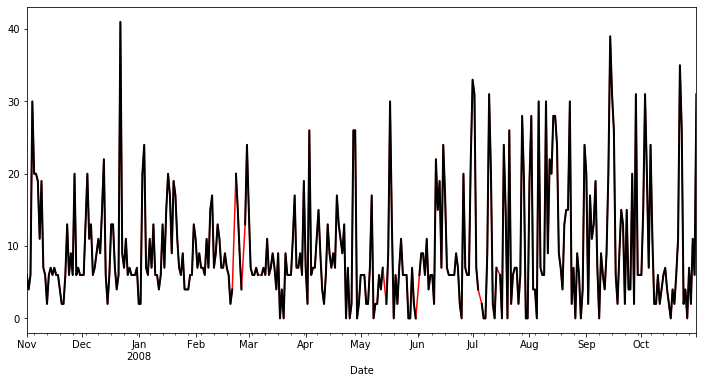

In [13]:
# This plot shows how linear interpolate will fix the data
fig, ax = plt.subplots(figsize=(12, 6))
# df['Sunshine'].plot(ax=ax)
# ax.set(title="AAPL daily closing price")
windsp_interp = df['WindSpeed9am'].interpolate('linear')
ax = windsp_interp.plot(c='r')
df['WindSpeed9am'].plot(c='k', ax=ax, lw=2)

In [14]:
df['Sunshine'] = df['Sunshine'].interpolate('linear')
df['WindGustSpeed'] = df['WindGustSpeed'].interpolate('linear')
df['WindSpeed9am'] = df['WindSpeed9am'].interpolate('linear')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2007-11-01 to 2008-10-31
Data columns (total 20 columns):
MinTemp          366 non-null float64
MaxTemp          366 non-null float64
Rainfall         366 non-null float64
Evaporation      366 non-null float64
Sunshine         366 non-null float64
WindGustDir      366 non-null object
WindGustSpeed    366 non-null float64
WindSpeed9am     366 non-null float64
WindSpeed3pm     366 non-null int64
Humidity9am      366 non-null int64
Humidity3pm      366 non-null int64
Pressure9am      366 non-null float64
Pressure3pm      366 non-null float64
Cloud9am         366 non-null int64
Cloud3pm         366 non-null int64
Temp9am          366 non-null float64
Temp3pm          366 non-null float64
RainToday        366 non-null object
RISK_MM          366 non-null float64
RainTomorrow     366 non-null object
dtypes: float64(12), int64(5), object(3)
memory usage: 60.0+ KB


In [15]:
num_predictors = df.select_dtypes(include=['float64', 'int64'])
num_predictors = num_predictors.columns
num_predictors

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

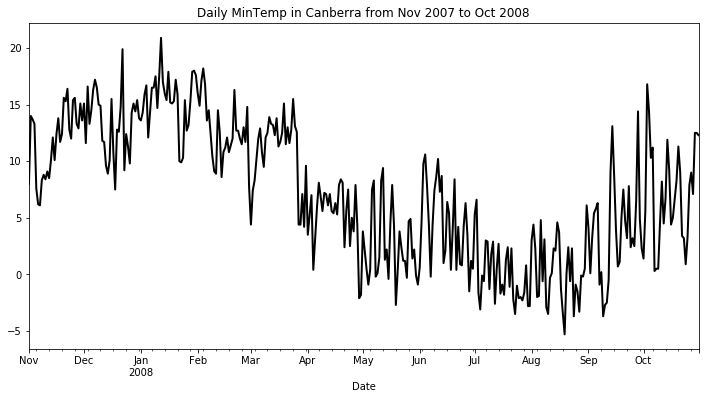

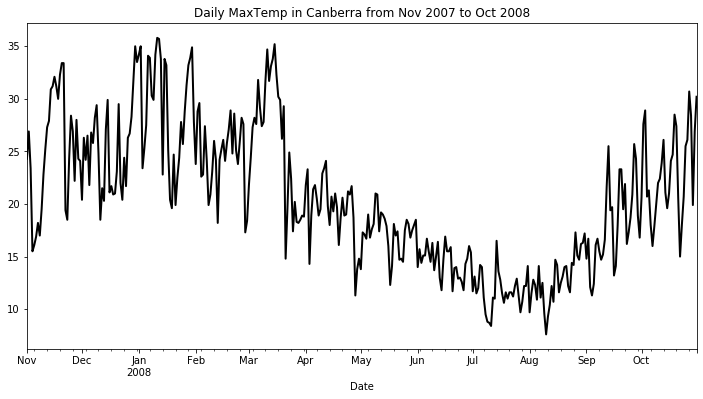

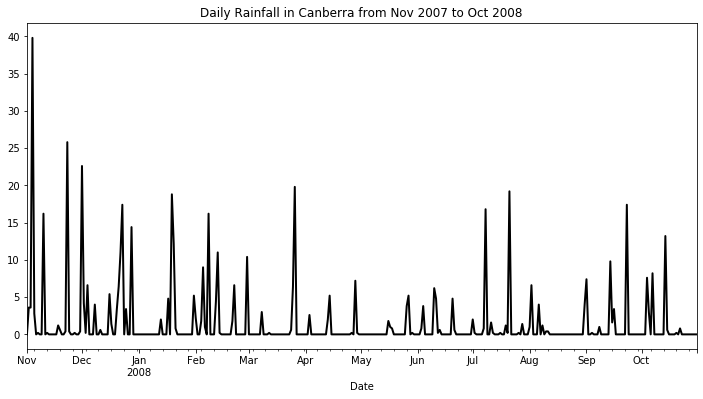

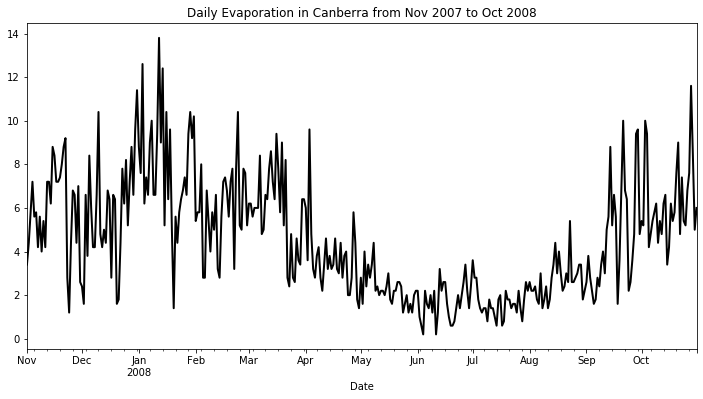

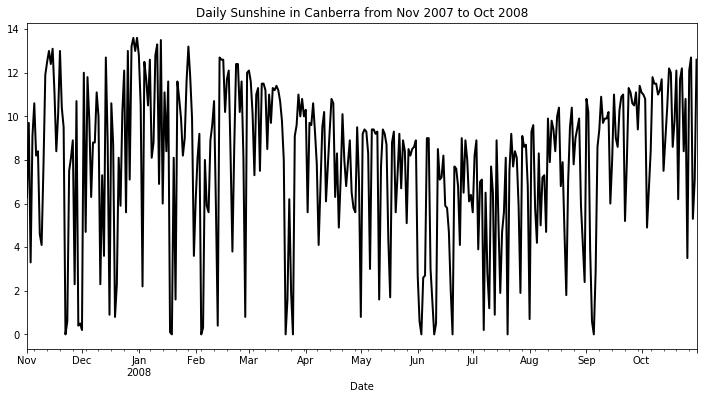

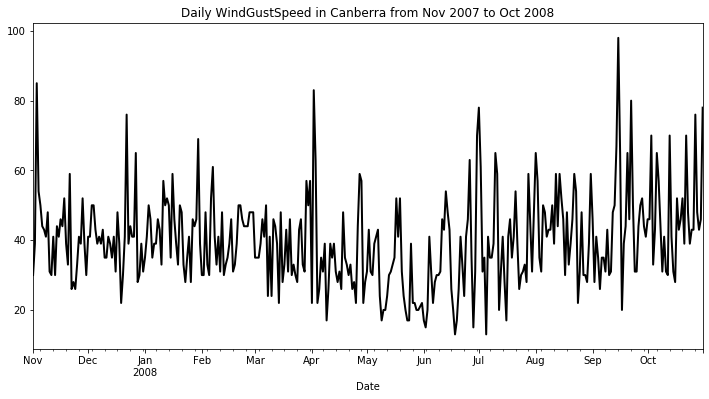

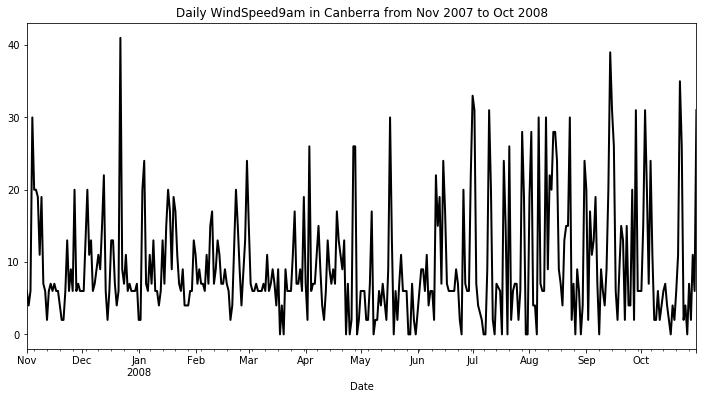

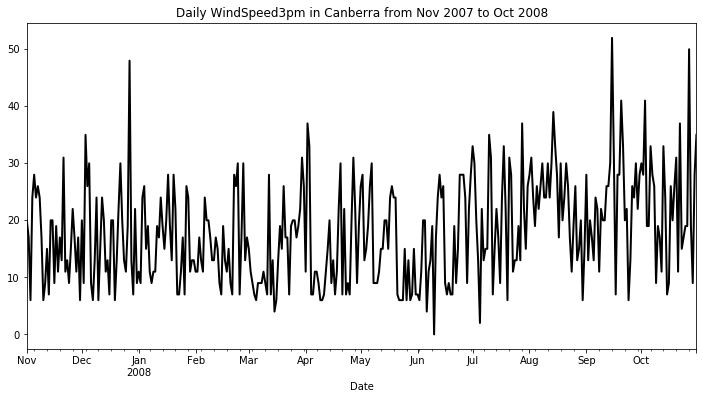

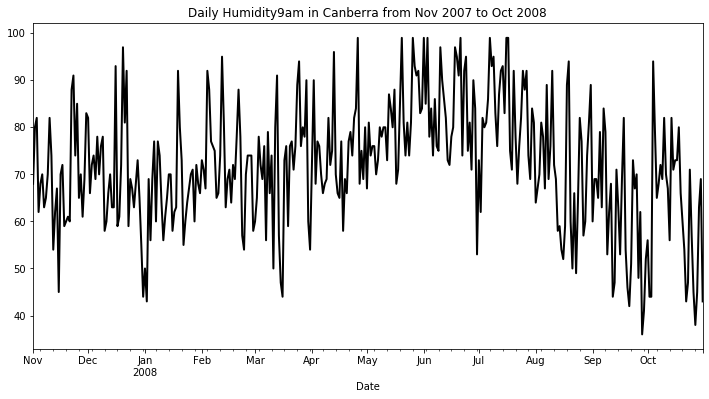

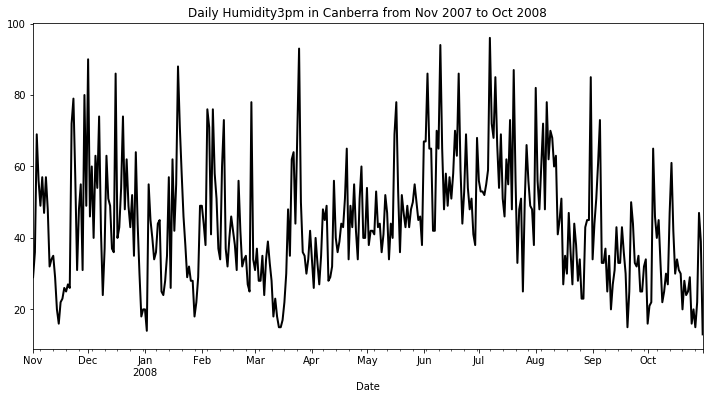

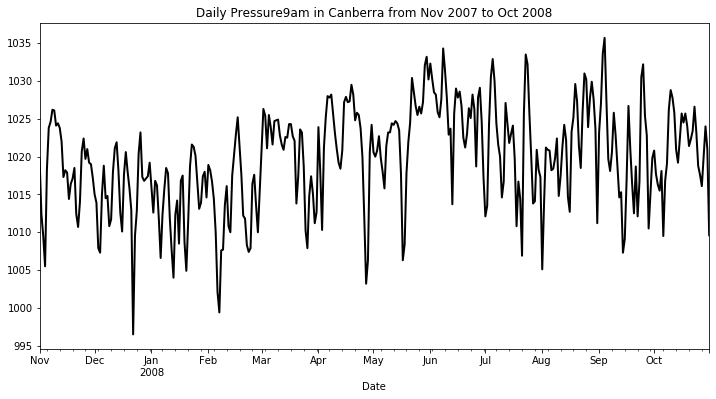

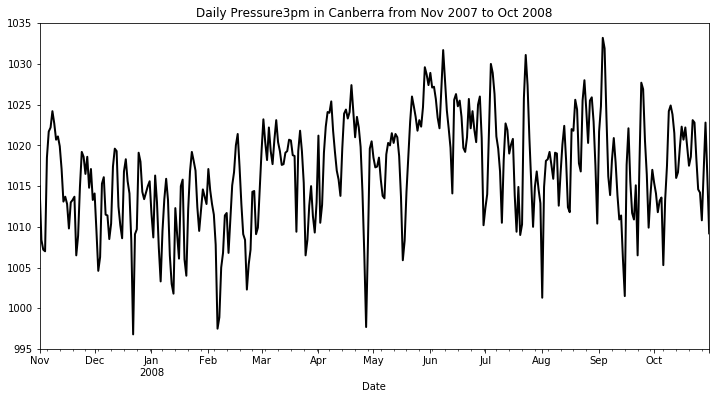

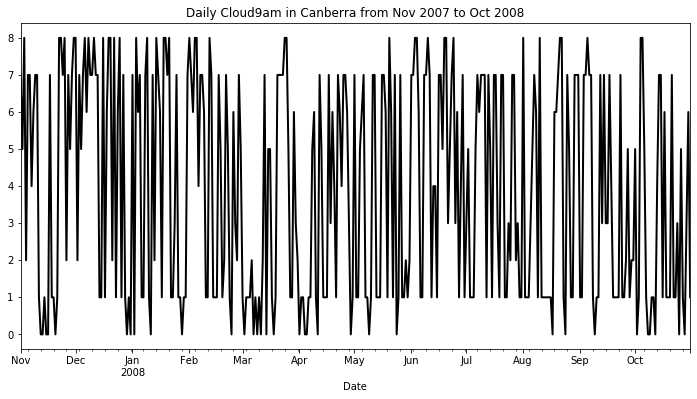

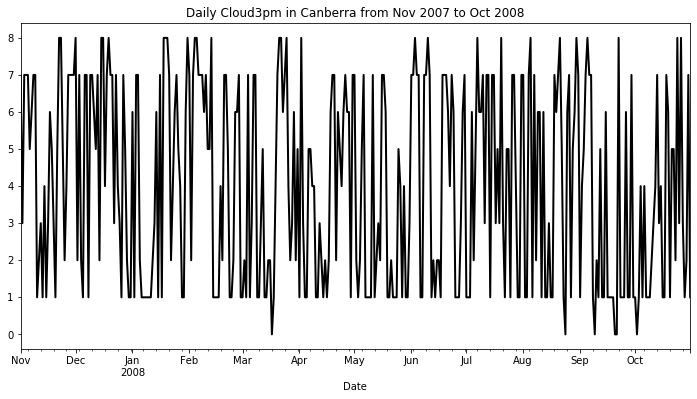

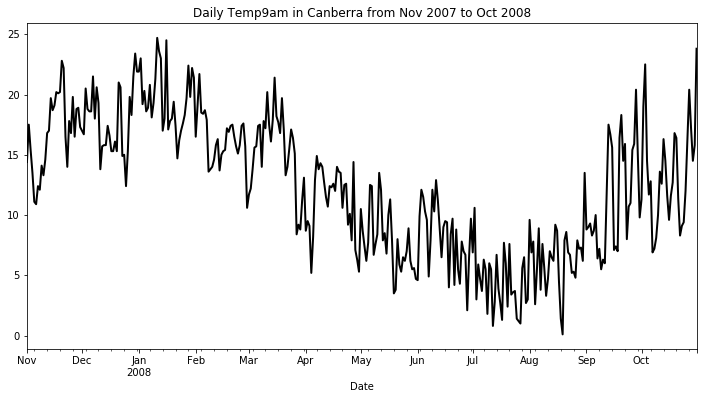

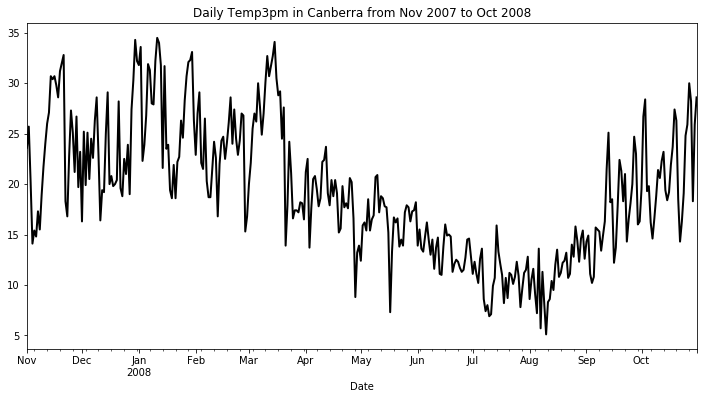

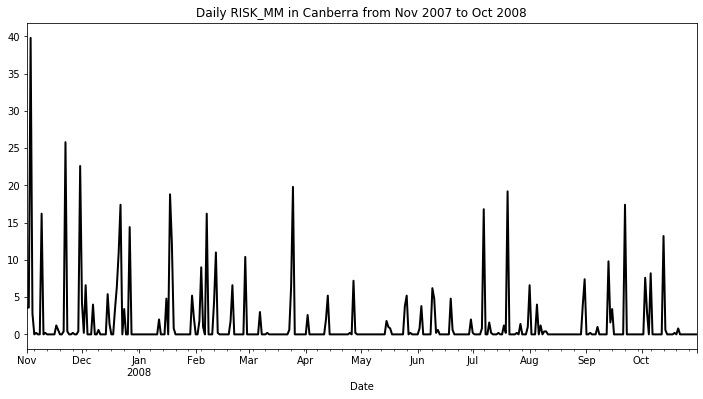

In [16]:
def plotAllColumns(columns):
    for col in columns:
        fig, ax = plt.subplots(figsize=(12, 6))
        df[col].plot(c='k', ax=ax, lw=2)
        ax.set(title="Daily " + col + " in Canberra from Nov 2007 to Oct 2008")
        plt.show()

# To plot using continuous variable.
plotAllColumns(num_predictors)

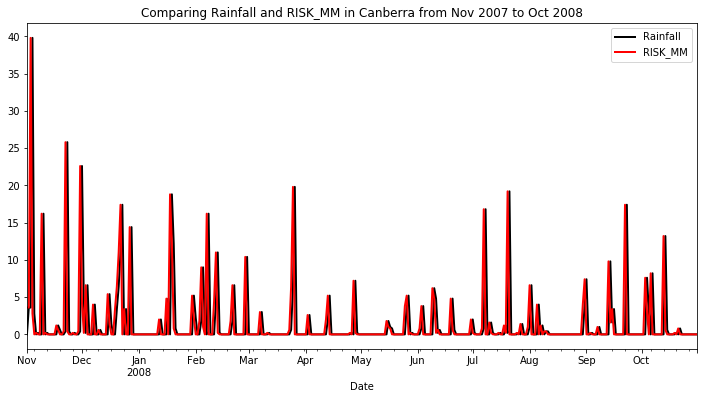

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
df['Rainfall'].plot(c='k', ax=ax, lw=2)
df['RISK_MM'].plot(c='r', ax=ax, lw=2)
ax.set(title="Comparing Rainfall and RISK_MM in Canberra from Nov 2007 to Oct 2008")
ax.legend()
plt.show()

# The amount of rainfall for RISK_MM is about the same as Rainfall on the previous day.

Hypotheses:

Some of the features may be correlated with each other:
+ `MinTemp` and `MaxTemp`
+ `Sunshine` and `Evaporation`
+ `WindSpeed9am` and `WindSpeed3pm` 
+ `Humidity9am` and `Humidity3pm` 
+ `Pressure9am` and `Pressure3pm` 
+ `Cloud9am` and `Cloud3pm` 
+ `Temp9am` and `Temp3pm`

To examine the collinearity between each continuous variable

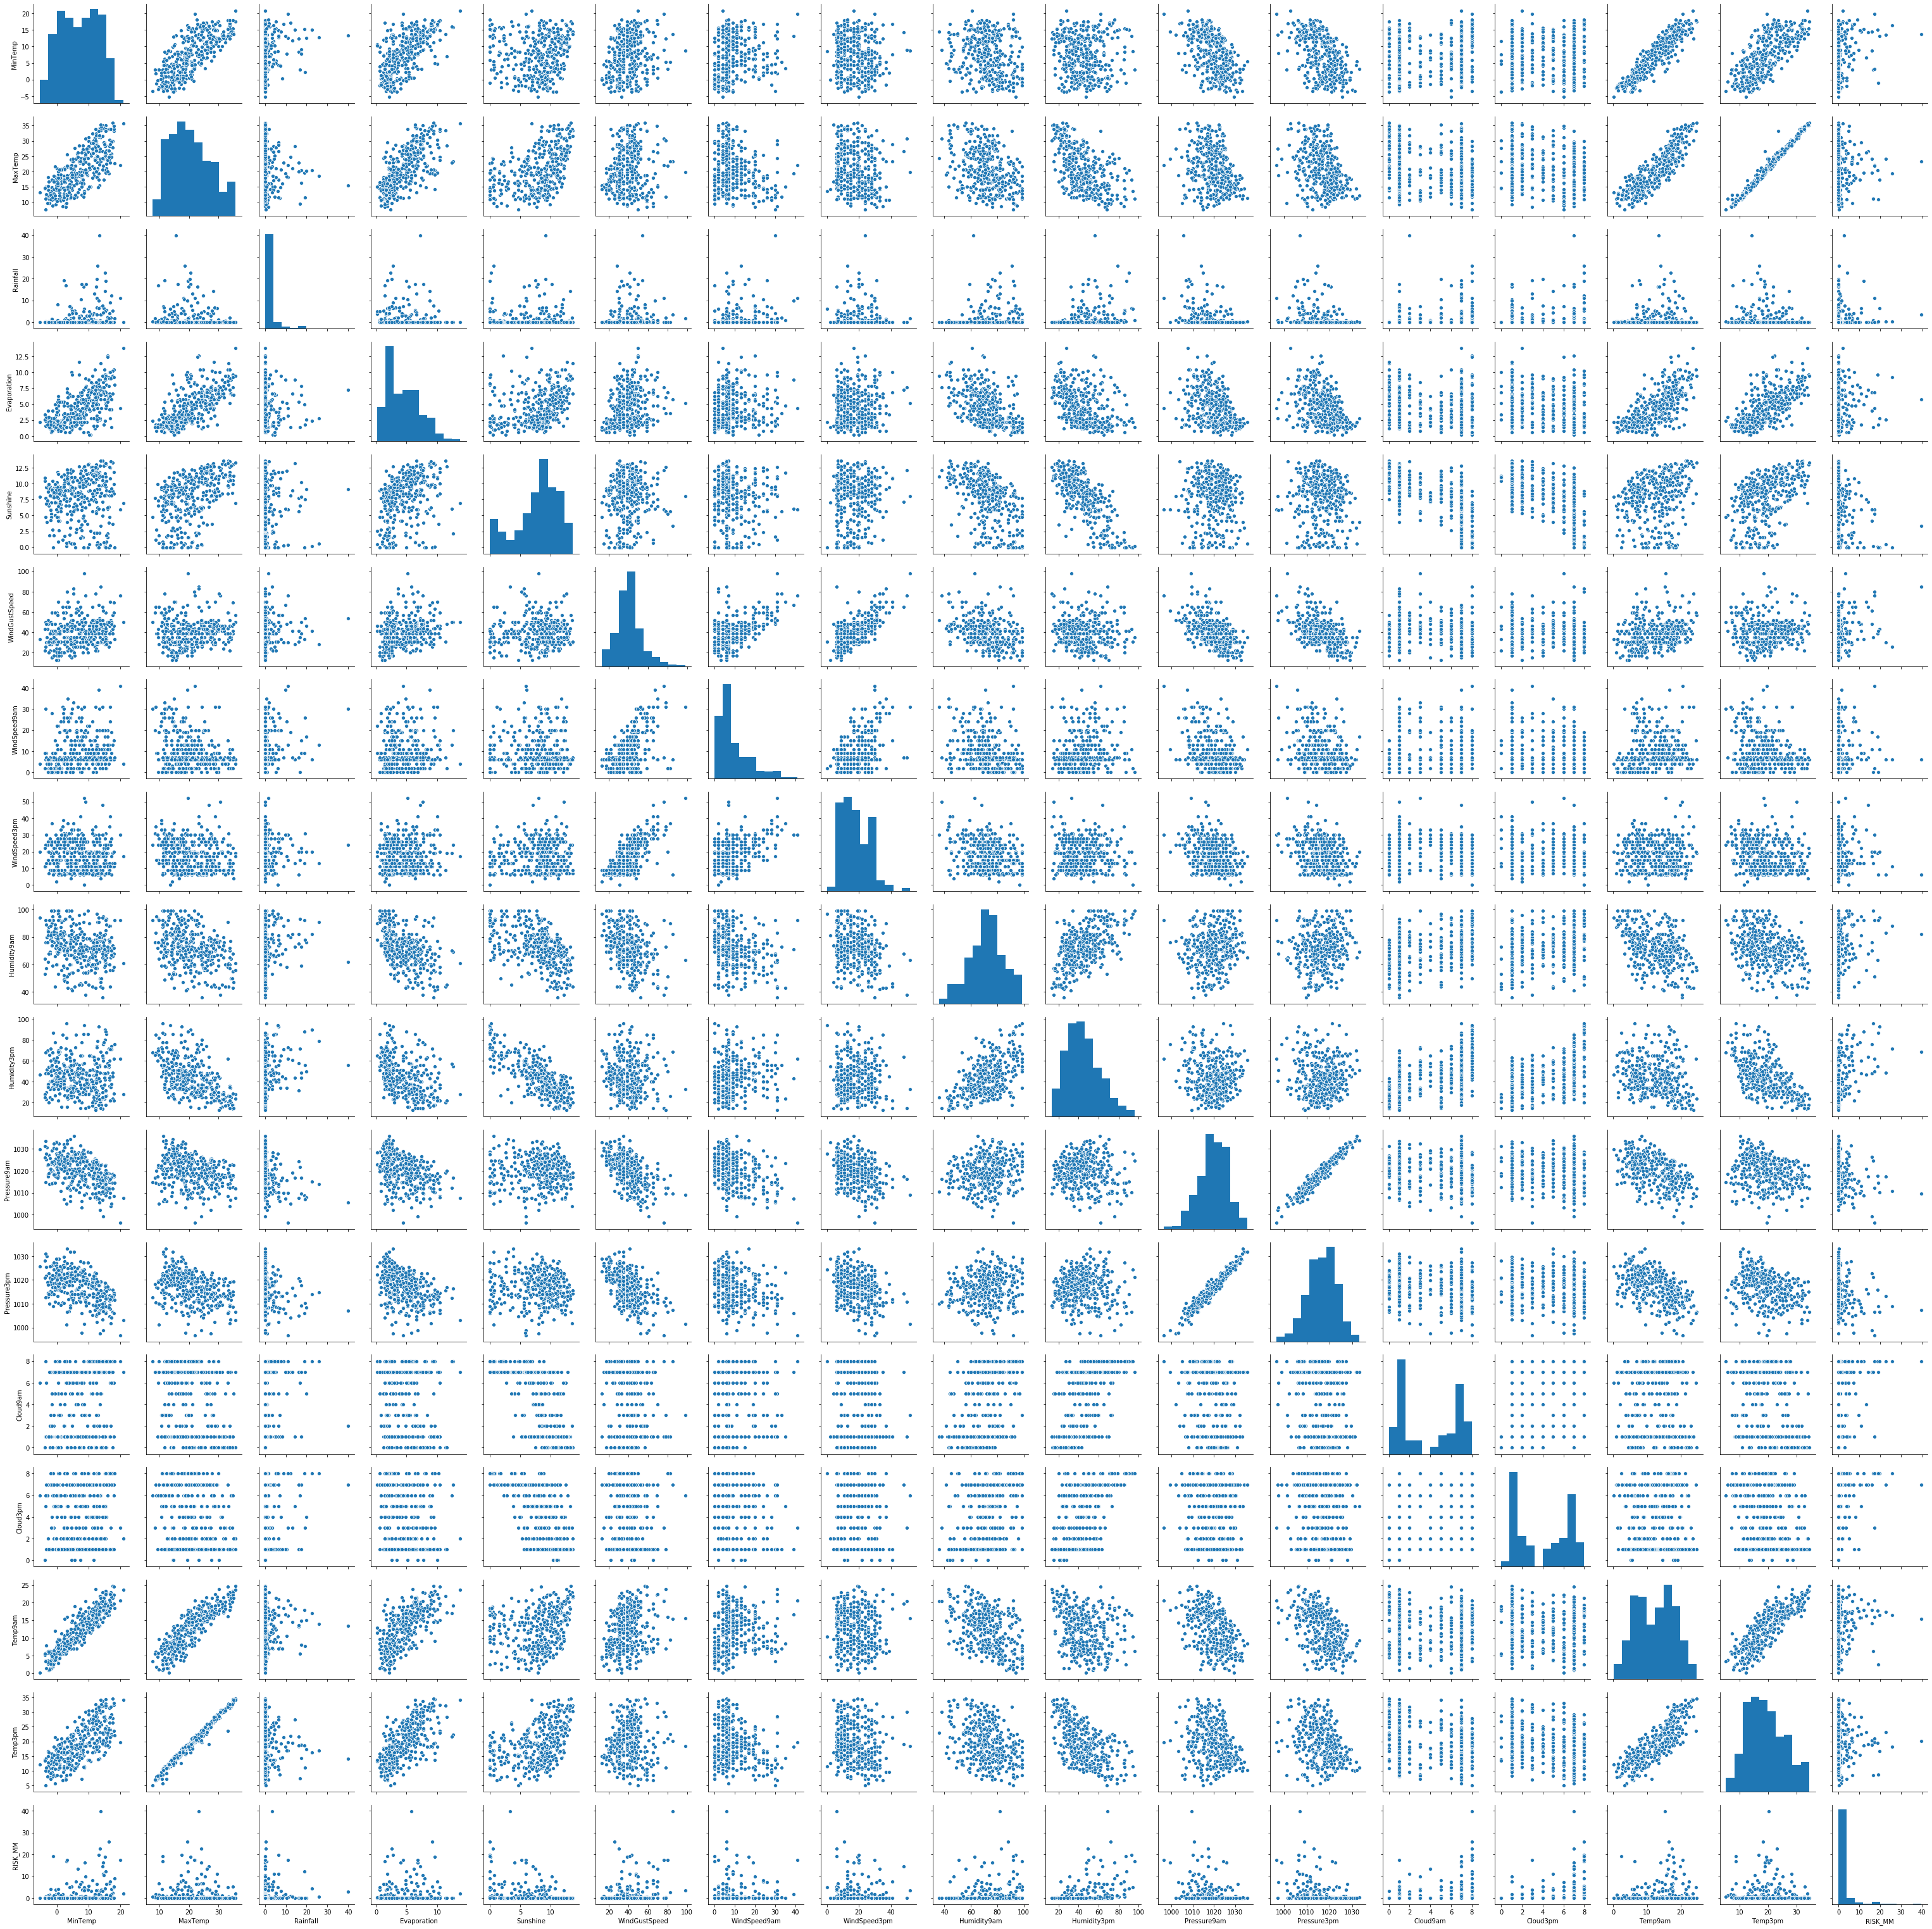

In [18]:
# scatterplot matrix.
sns.pairplot(df[num_predictors])

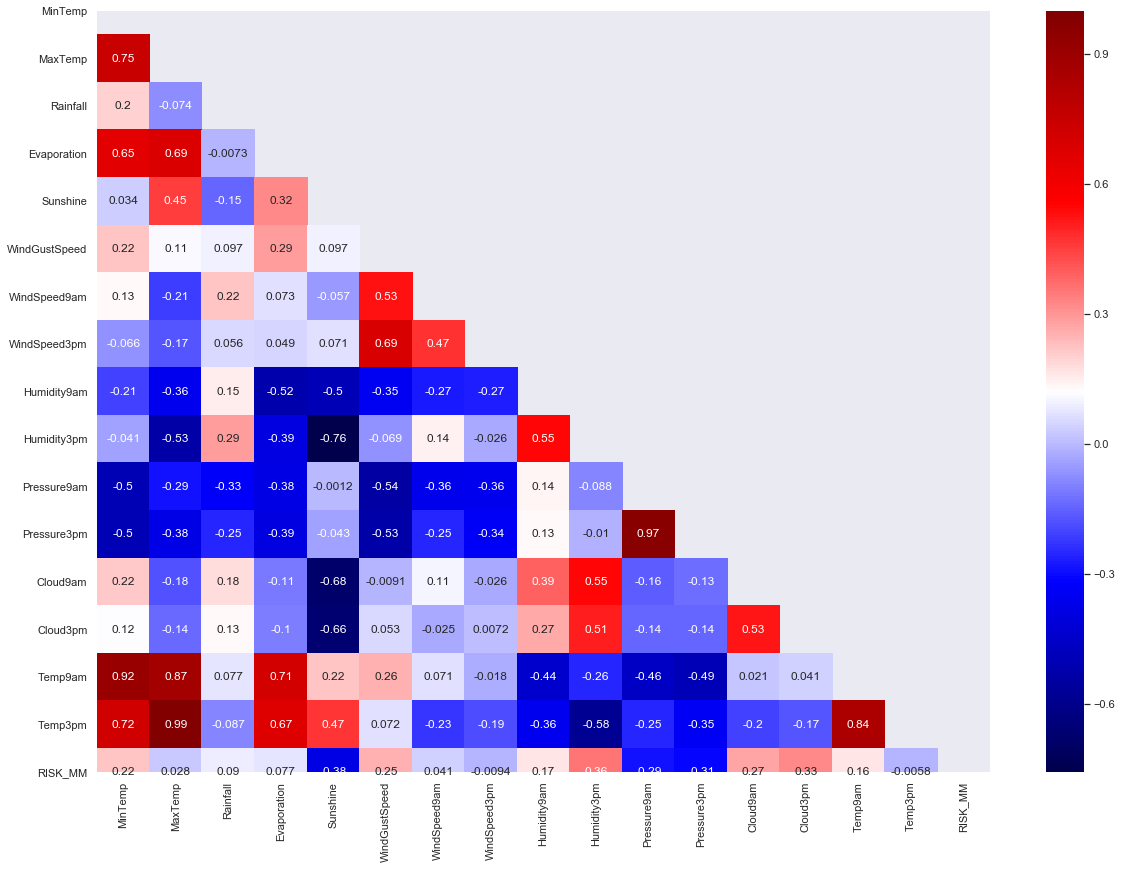

In [19]:
# heatmap
correlation_matrix = df[num_predictors].corr()

mask = np.zeros_like(correlation_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize':(20,14)})
sns.heatmap(data=correlation_matrix, mask=mask, cmap='seismic',annot=True)

In [20]:
sort_cm = correlation_matrix.unstack()
sort_cm = sort_cm.sort_values(kind="quicksort")
sort_cm

Sunshine     Humidity3pm   -0.758257
Humidity3pm  Sunshine      -0.758257
Cloud9am     Sunshine      -0.680337
Sunshine     Cloud9am      -0.680337
Cloud3pm     Sunshine      -0.662696
                              ...   
Evaporation  Evaporation    1.000000
Rainfall     Rainfall       1.000000
MaxTemp      MaxTemp        1.000000
Temp3pm      Temp3pm        1.000000
RISK_MM      RISK_MM        1.000000
Length: 289, dtype: float64

In [21]:
# These are the very highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm > 0.95) | (sort_cm[sort_cm < -0.95])) & sort_cm[sort_cm != 1]].drop_duplicates()

Pressure3pm  Pressure9am    0.967895
Temp3pm      MaxTemp        0.989261
dtype: float64

In [22]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm >= 0.8) & (sort_cm < 0.95) | (sort_cm <= -0.8) & (sort_cm[sort_cm > -0.95])) & sort_cm[sort_cm != 1]].drop_duplicates()

Temp9am  Temp3pm    0.844406
MaxTemp  Temp9am    0.870604
Temp9am  MinTemp    0.916745
dtype: float64

In [23]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm >= 0.4) & (sort_cm < 0.8))].drop_duplicates()

MaxTemp       Sunshine         0.451405
Temp3pm       Sunshine         0.470140
WindSpeed3pm  WindSpeed9am     0.474020
Cloud3pm      Humidity3pm      0.510108
              Cloud9am         0.525218
WindSpeed9am  WindGustSpeed    0.530742
Humidity9am   Humidity3pm      0.546718
Humidity3pm   Cloud9am         0.551633
MinTemp       Evaporation      0.649930
Temp3pm       Evaporation      0.671632
Evaporation   MaxTemp          0.690026
WindSpeed3pm  WindGustSpeed    0.693339
Evaporation   Temp9am          0.707676
Temp3pm       MinTemp          0.722730
MaxTemp       MinTemp          0.752471
dtype: float64

In [24]:
# These are the highly collinear variables
# To drop either one or merging them together
sort_cm[((sort_cm <= -0.4) & (sort_cm[sort_cm > -0.8]))].drop_duplicates()

Sunshine       Humidity3pm     -0.758257
Cloud9am       Sunshine        -0.680337
Cloud3pm       Sunshine        -0.662696
Humidity3pm    Temp3pm         -0.581676
WindGustSpeed  Pressure9am     -0.543260
MaxTemp        Humidity3pm     -0.533327
Pressure3pm    WindGustSpeed   -0.530092
Humidity9am    Evaporation     -0.519587
MinTemp        Pressure9am     -0.501707
               Pressure3pm     -0.498007
Sunshine       Humidity9am     -0.497090
Temp9am        Pressure3pm     -0.492636
Pressure9am    Temp9am         -0.460418
Temp9am        Humidity9am     -0.436551
dtype: float64

In [25]:
sorted_cm = sort_cm.reset_index()
# sorted_cm.columns
sorted_cm[sorted_cm['level_0'] == 'RISK_MM'].sort_values(by=0, ascending=False)

level_0        level_1         0
288  RISK_MM        RISK_MM  1.000000
228  RISK_MM    Humidity3pm  0.358752
226  RISK_MM       Cloud3pm  0.326455
218  RISK_MM       Cloud9am  0.273914
213  RISK_MM  WindGustSpeed  0.252110
206  RISK_MM        MinTemp  0.218551
196  RISK_MM    Humidity9am  0.165931
195  RISK_MM        Temp9am  0.164842
171  RISK_MM       Rainfall  0.089860
167  RISK_MM    Evaporation  0.076762
148  RISK_MM   WindSpeed9am  0.040795
144  RISK_MM        MaxTemp  0.027557
136  RISK_MM        Temp3pm -0.005825
130  RISK_MM   WindSpeed3pm -0.009447
58   RISK_MM    Pressure9am -0.290584
54   RISK_MM    Pressure3pm -0.311421
32   RISK_MM       Sunshine -0.382438

In [26]:
sorted_cm[sorted_cm['level_0'] == 'RainTomorrow'].sort_values(by=0, ascending=False)

Empty DataFrame
Columns: [level_0, level_1, 0]
Index: []

#### Explore RainTomorrow with Continuous Variable

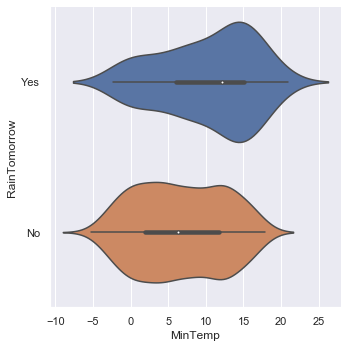

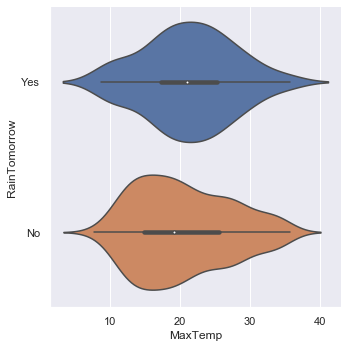

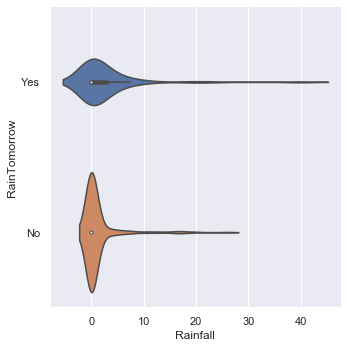

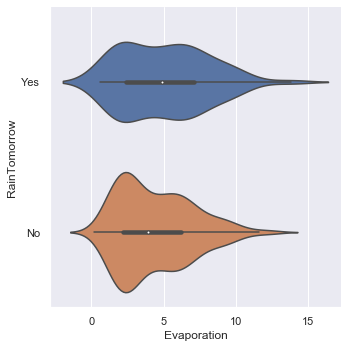

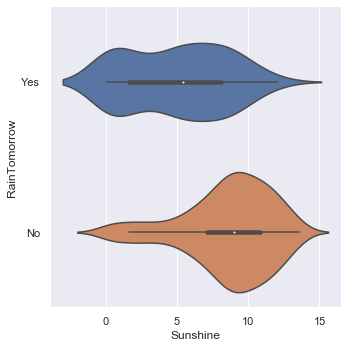

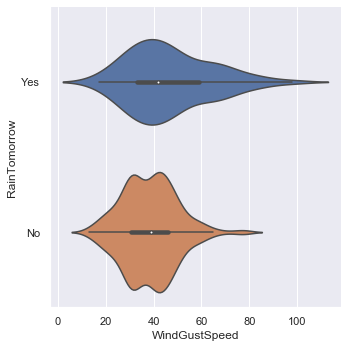

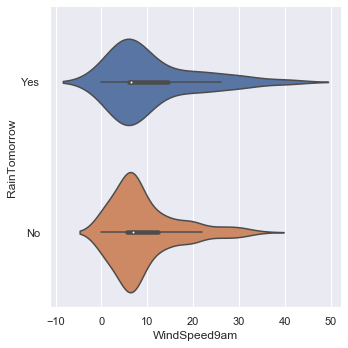

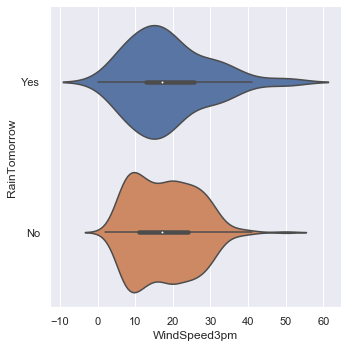

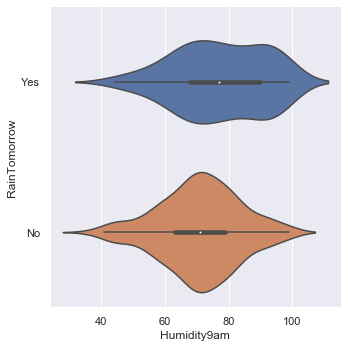

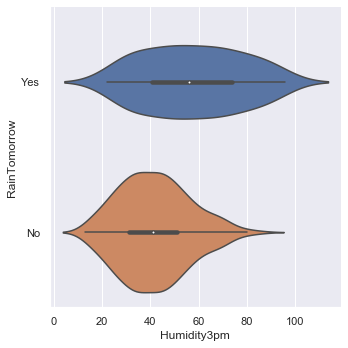

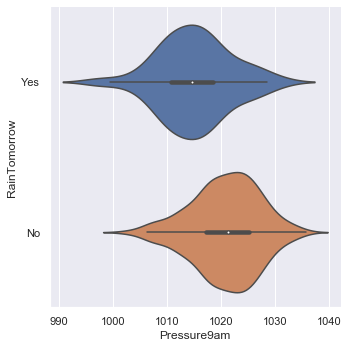

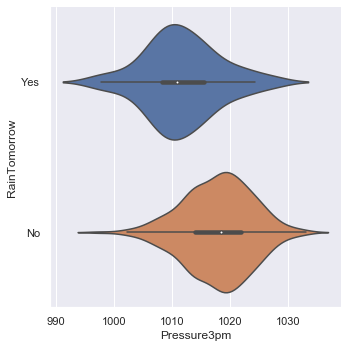

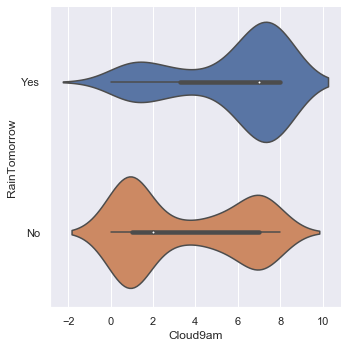

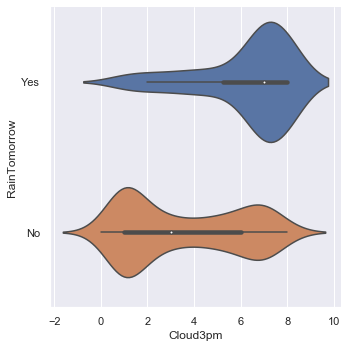

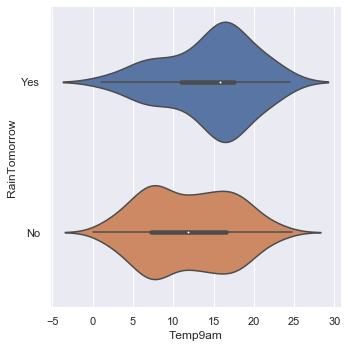

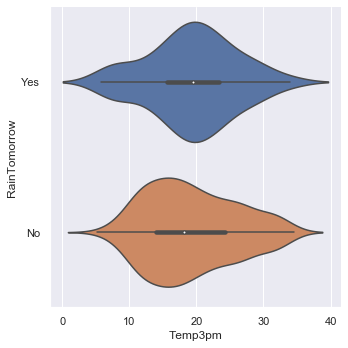

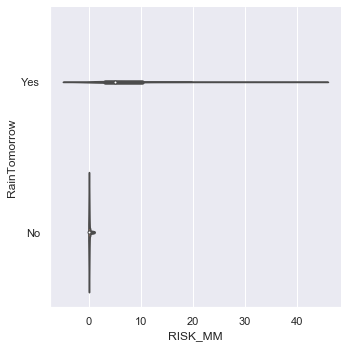

In [27]:
def plotColumnsVsRainTomorrow(df, columns):
    for col in columns:
        sns.catplot(y="RainTomorrow", x=col, kind='violin', data=df);   
        plt.show()
        

# To plot using continuous variable.
plotColumnsVsRainTomorrow(df, num_predictors)

There is a lot of features to examine for collinearity. So perhaps we can do some feature engineering to reduce the number of predictors to work with.

#### Feature Selection and Engineering

In [28]:
all_predictors = list(df.columns)
all_predictors.remove(all_predictors[-1])
all_predictors.remove(all_predictors[-1])
all_predictors

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [29]:
round(df[all_predictors].describe(),2)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count   366.00   366.00    366.00       366.00    366.00         366.00   
mean      7.27    20.55      1.43         4.52      7.90          39.80   
std       6.03     6.69      4.23         2.67      3.48          13.06   
min      -5.30     7.60      0.00         0.20      0.00          13.00   
25%       2.30    15.02      0.00         2.20      5.93          31.00   
50%       7.45    19.65      0.00         4.20      8.60          39.00   
75%      12.50    25.50      0.20         6.40     10.50          46.00   
max      20.90    35.80     39.80        13.80     13.60          98.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count        366.00        366.00       366.00       366.00       366.00   
mean           9.59         17.99        72.04        44.52      1019.71   
std            7.90          8.86        13.14        16.85         6.69   
min            0.00          0.00        36.00        13.00       996.50   
25%            6.00         11.00        64.00        32.25      1015.35   
50%            7.00         17.00        72.00        43.00      1020.15   
75%           13.00         24.00        81.00        55.00      1024.47   
max           41.00         52.00        99.00        96.00      1035.70   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
count       366.00    366.00    366.00   366.00   366.00  
mean       1016.81      3.89      4.02    12.36    19.23  
std           6.47      2.96      2.67     5.63     6.64  
min         996.80      0.00      0.00     0.10     5.10  
25%        1012.80      1.00      1.00     7.62    14.15  
50%        1017.40      3.50      4.00    12.55    18.55  
75%        1021.48      7.00      7.00    17.00    24.00  
max        1033.20      8.00      8.00    24.70    34.50

In [30]:
from sklearn.model_selection import train_test_split
X = df[df.columns[:-2]]
y_Risk_MM = df[['RISK_MM']]
y_RainTomorrow = df[['RainTomorrow']]

In [31]:
def preprocessData(X, y_RainTomorrow):
    # Preprocess Categorical Variables
    rain_mapper = {"No": 0, "Yes": 1}

    X['RainToday'] = X['RainToday'].map(rain_mapper)
    y_RainTomorrow['RainTomorrow'] = y_RainTomorrow['RainTomorrow'].map(rain_mapper)

    X = pd.get_dummies(X)
    return X, y_RainTomorrow

In [32]:
X, y_RainTomorrow = preprocessData(X, y_RainTomorrow)

In [33]:
# Reference Group will be E
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW'],
      dtype='object')

In [34]:
# For Regression
X_train, X_test, y_train_Risk_MM, y_test_Risk_MM = train_test_split(X, y_Risk_MM, test_size=0.2, shuffle=False)

# For Classification
X_train, X_test, y_train_RainTomorrow, y_test_RainTomorrow = train_test_split(X, y_RainTomorrow, test_size=0.2, shuffle=False)
X_train.tail()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
Date                                                                           
2008-08-14      2.1     10.7       0.0          3.4       9.4           59.0   
2008-08-15      4.6     14.7       0.0          4.4       8.4           52.0   
2008-08-16      3.7     14.2       0.0          3.0      10.0           46.0   
2008-08-17     -1.3     11.6       0.0          4.0      10.4           30.0   
2008-08-18     -3.4     12.5       0.0          3.0       6.8           48.0   

            WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
Date                                                              ...   
2008-08-14          28.0            39           59           45  ...   
2008-08-15          28.0            33           54           51  ...   
2008-08-16          24.0            28           52           27  ...   
2008-08-17           9.0            17           59           35  ...   
2008-08-18           7.0            30           89           30  ...   

            WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  WindGustDir_SE  \
Date                                                                         
2008-08-14                0               1              0               0   
2008-08-15                0               0              0               0   
2008-08-16                1               0              0               0   
2008-08-17                0               0              0               0   
2008-08-18                0               0              0               0   

            WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  \
Date                                                                          
2008-08-14                0                0               0              0   
2008-08-15                0                0               0              0   
2008-08-16                0                0               0              0   
2008-08-17                0                0               0              0   
2008-08-18                1                0               0              0   

            WindGustDir_WNW  WindGustDir_WSW  
Date                                          
2008-08-14                0                0  
2008-08-15                1                0  
2008-08-16                0                0  
2008-08-17                0                0  
2008-08-18                0                0  

[5 rows x 33 columns]

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

#### Dimensionality Reduction using PCA

In [37]:
# To see how many principal components are best for our model
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_transformed)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Variance Ratio')

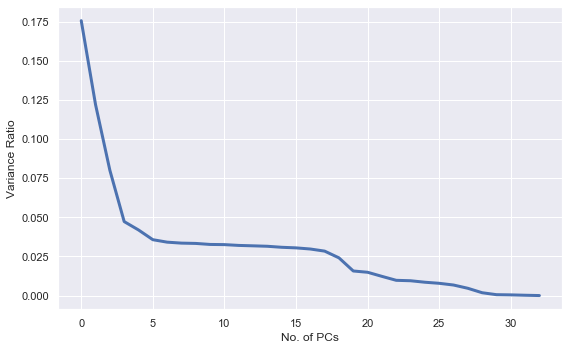

In [38]:
# Plotting to visualize the best number of PCs
plt.figure(figsize=(10,6))
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=3)
plt.xlabel('No. of PCs')
plt.ylabel('Variance Ratio')

From PCA, most of the variance can be explained by best 5 principal components

#### Feature selection using RandomForest's feature importance 

In [39]:
from sklearn.ensemble import RandomForestClassifier

rtc = RandomForestClassifier(random_state=1234)  

rfctree = rtc.fit(X_train_transformed, y_train_RainTomorrow)

relevances = rfctree.feature_importances_

# Apply the tree based on importance for the random forest classifier and indexing it
std = np.std([tree.feature_importances_ for tree in rfctree.estimators_], axis=0)
indices = np.argsort(relevances)[::-1]

# Printting the ranking of importance
print("Feature Ranking:")

for i in range(X_train_transformed.shape[1]):
    print("%d." % (i + 1) + "{} : ({})".format(X_train.columns[indices[i]], relevances[indices[i]]))

Feature Ranking:
1.Sunshine : (0.12090155939077264)
2.Humidity3pm : (0.11659583877181272)
3.Cloud9am : (0.08006988078952039)
4.MinTemp : (0.07004011259037345)
5.WindGustSpeed : (0.06780975537159244)
6.Cloud3pm : (0.06349174930383837)
7.MaxTemp : (0.05964688044876579)
8.Pressure3pm : (0.05940662171252806)
9.Humidity9am : (0.054633477559489024)
10.Temp9am : (0.04741934524596957)
11.Pressure9am : (0.04648195267429317)
12.Evaporation : (0.04503835193232558)
13.Temp3pm : (0.04211694976497)
14.WindSpeed3pm : (0.03191398975604789)
15.WindSpeed9am : (0.028726218601151026)
16.Rainfall : (0.021195489971997387)
17.WindGustDir_SSE : (0.007704229576793665)
18.WindGustDir_W : (0.007642049137233321)
19.WindGustDir_ESE : (0.004272137615824162)
20.RainToday : (0.003676789644543628)
21.WindGustDir_WNW : (0.003584633951060096)
22.WindGustDir_NNW : (0.0035489278476953648)
23.WindGustDir_E : (0.003424295352270614)
24.WindGustDir_SW : (0.002677852926311177)
25.WindGustDir_ENE : (0.002609904661016951)
26.Win

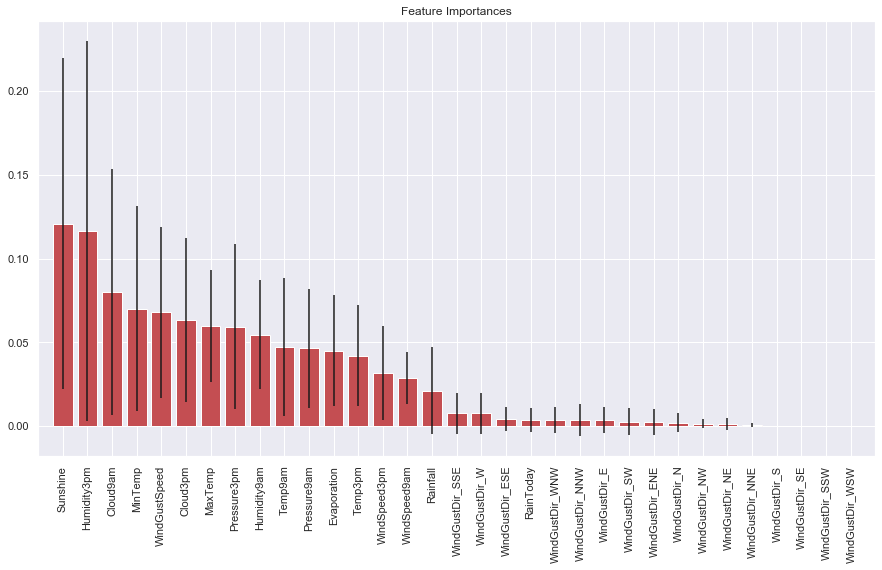

In [40]:
# Plotting the feature importances
plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.bar(range(X_train_transformed.shape[1]), relevances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_transformed.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train_transformed.shape[1]])
plt.show()

In [41]:
from sklearn.metrics import roc_auc_score
y_pred_RainTomorrow = rfctree.predict(X_test_transformed)
accuracy = roc_auc_score(y_test_RainTomorrow, y_pred_RainTomorrow)
print("Model AUC is {:.3f}".format(accuracy))

Model AUC is 0.600


#### Model Building and Evaluation

In [42]:
from sklearn.pipeline import Pipeline

In [43]:
estimators = []
hyperparams = []

In [44]:
import xgboost as xgb
estimator_xgb = Pipeline([('scalar', StandardScaler()),
                    ('pca', PCA()),
                    ('xgb', xgb.XGBClassifier())])

xgb_params = {
            'pca__n_components': [2, 5, 15, 20],
            'xgb__objective' : ['binary:logistic'],
            'xgb__max_depth': [5, 10, 25],
            'xgb__n_estimators': [10, 25, 40, 65, 100], 
            'xgb__seed': [1234]
          }
                        
estimators.append(estimator_xgb)

hyperparams.append(xgb_params)

In [45]:
from sklearn.linear_model import LogisticRegression

estimator_lr = Pipeline([('scalar', StandardScaler()),
         ('lr', LogisticRegression(random_state=1234))])

lr_params = {
              'lr__C': [0.5],
              'lr__solver': ['newton-cg', 'sag', 'lbfgs'],
              'lr__max_iter': [100, 200, 300],
              'lr__random_state': [0, 1234]
             }

estimators.append(estimator_lr)
hyperparams.append(lr_params)


In [46]:
from sklearn.svm import SVC

estimator_svc = Pipeline([('scalar', StandardScaler()),
#          ('pca', PCA()),
         ('svc', SVC())])

svc_params = {
#               'pca__n_components': [2, 5, 15, 20],
              'svc__C': [0.5, 1],
              'svc__kernel': ['rbf', 'sigmoid'],
              'svc__degree': [1,3,5,7,9],
              'svc__gamma': ['scale','auto'],
              'svc__random_state': [0, 1234]
             }

estimators.append(estimator_svc)
hyperparams.append(svc_params)

In [47]:
from sklearn.tree import DecisionTreeClassifier

estimator_dtc = Pipeline([('scalar', StandardScaler()),
         ('pca', PCA()),
         ('dtc', DecisionTreeClassifier())])

dtc_params = {
              'pca__n_components': [15, 20, 30, 32],              
              'dtc__criterion': ['gini', 'entropy'], 
              'dtc__max_depth': [5, 7, 10], 
              'dtc__min_samples_split': [2, 4, 6],
              'dtc__min_samples_leaf': [1, 3, 5],
              'dtc__random_state': [1234]
             }
estimators.append(estimator_dtc)
hyperparams.append(dtc_params)

In [48]:
estimator_rfc = Pipeline([
         ('scalar', StandardScaler()),
         ('pca', PCA()),
         ('rfc', RandomForestClassifier())])

rfc_params = {
              'pca__n_components': [32],
              'rfc__n_estimators': [300], 
              'rfc__criterion': ['entropy'], 
              'rfc__max_depth': [15, 20, 25], 
              'rfc__min_samples_split': [6, 8, 10],
              'rfc__min_samples_leaf': [1],
              'rfc__bootstrap': [False],
              'rfc__random_state': [1234]
             }

estimators.append(estimator_rfc)
hyperparams.append(rfc_params)

#### Evaluation Functions

In [49]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, f1_score, auc, precision_recall_curve, classification_report

In [50]:
def evaluateClassifier(model, X_test, y_test):
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print("Model Accuracy on Test is {:.3f}".format(accuracy))
    
    auc = roc_auc_score(y_test, y_pred)
    print("Model AUC on Test is {:.3f}".format(auc))
    
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
    cm = pd.DataFrame(
        cm, 
        index=['True: Rain Tomorrow', 'True: Not Rain Tomorrow'], 
        columns=['Pred: Rain Tomorrow', 'Pred: Not Rain Tomorrow']
    )
    print(cm)

    precision = precision_score(y_test, y_pred)
    print("\nThe precision of the classifier is {:.2%}".format(precision))

    # recall
    recall = recall_score(y_test, y_pred)
    print("\nThe recall of the classifier is {:.2%}".format(recall))

    # recall
    f1 = f1_score(y_test, y_pred, labels=['Survived'])
    print("\nThe f1 score of the classifier is {:.2%}".format(f1))
    
    return auc, cm, precision, recall, f1

In [51]:
def drawROC(estimator, X_test, y_test):
    y_prob = estimator.predict_proba(X_test) [:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate: Sensitivity')
    plt.xlabel('False Positive Rate: (1-Specificity)')
    plt.show()

# drawROC(estimator)

In [52]:
def drawPrecisionRecallCurve(estimator, X_test, y_test):
    y_prob = estimator.predict_proba(X_test) [:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.plot(recall, precision, lw=2, label='Survived')

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.title("Precision vs. Recall Curve")
    plt.show()

# drawPrecisionRecallCurve(y_train, y_prob)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def evaluateRegressionModel(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("R-squared is {:.3f}, Mean Square Error is {:.3f} and RSME is {:.3f}".format(r2, mse, rmse))
    return r2, mse, rmse

#### Cross-Validation and evaluation

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
df['RainTomorrow'].value_counts()
# For this case of weather prediction, since RainTommorrow is imbalanced dataset towards No,
# AUC is a better scoring than accuracy

No     300
Yes     66
Name: RainTomorrow, dtype: int64

Try Different Sampling methods due to imbalanced data

In [56]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [57]:
# For Classification
training_data = []

X_train, X_test, y_train_RainTomorrow, y_test_RainTomorrow = train_test_split(X, y_RainTomorrow, test_size=0.2, shuffle=False)
# print(X_train.shape)

training_data.append((X_train, y_train_RainTomorrow))

X_train_oversampled, y_train_RainTomorrow_oversampled = SMOTE(random_state=1234).fit_sample(X_train, y_train_RainTomorrow)

training_data.append((X_train_oversampled, y_train_RainTomorrow_oversampled))

X_train_undersampled, y_train_RainTomorrow_undersampled = RandomUnderSampler(random_state=1234).fit_sample(X_train, y_train_RainTomorrow)

training_data.append((X_train_undersampled, y_train_RainTomorrow_undersampled))


In [58]:
evaluation = {'estimators': [],
              'train_auc': [],
              'test_auc': [],
              'confusion_matrix': [],
              'precision': [],
              'recall': [],
              'f1':[]
             }

for idx, est in enumerate(estimators):
    estimator = GridSearchCV(est, hyperparams[idx], scoring='roc_auc', cv=5)
    
    for train in training_data: 
        estimator.fit(train[0], train[1])
        evaluation['estimators'].append(estimator)

        print("\nEstimator {} Best Hyperparams: \n{}\n".format(idx+1, estimator.best_params_))
        print("Estimator {} Best Training Score: {}".format(idx+1, estimator.best_score_))
        auc, cm, precision, recall, f1 = evaluateClassifier(estimator.best_estimator_, X_test, y_test_RainTomorrow)
        evaluation['train_auc'].append(estimator.best_score_)
        evaluation['test_auc'].append(auc)
        evaluation['confusion_matrix'].append(confusion_matrix)
        evaluation['precision'].append(precision)
        evaluation['recall'].append(recall)
        evaluation['f1'].append(f1)


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 1 Best Hyperparams: 
{'pca__n_components': 20, 'xgb__max_depth': 5, 'xgb__n_estimators': 100, 'xgb__objective': 'binary:logistic', 'xgb__seed': 1234}

Estimator 1 Best Training Score: 0.8093029077572578
Model Accuracy on Test is 0.851
Model AUC on Test is 0.703
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        5                        5
True: Not Rain Tomorrow                    6                       58

The precision of the classifier is 45.45%

The recall of the classifier is 50.00%

The f1 score of the classifier is 47.62%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 1 Best Hyperparams: 
{'pca__n_components': 20, 'xgb__max_depth': 25, 'xgb__n_estimators': 100, 'xgb__objective': 'binary:logistic', 'xgb__seed': 1234}

Estimator 1 Best Training Score: 0.9413541291020555
Model Accuracy on Test is 0.892
Model AUC on Test is 0.811
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7                        3
True: Not Rain Tomorrow                    5                       59

The precision of the classifier is 58.33%

The recall of the classifier is 70.00%

The f1 score of the classifier is 63.64%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 1 Best Hyperparams: 
{'pca__n_components': 15, 'xgb__max_depth': 10, 'xgb__n_estimators': 100, 'xgb__objective': 'binary:logistic', 'xgb__seed': 1234}

Estimator 1 Best Training Score: 0.8100649350649352
Model Accuracy on Test is 0.851
Model AUC on Test is 0.872
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        9                        1
True: Not Rain Tomorrow                   10                       54

The precision of the classifier is 47.37%

The recall of the classifier is 90.00%

The f1 score of the classifier is 62.07%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 2 Best Hyperparams: 
{'lr__C': 0.5, 'lr__max_iter': 100, 'lr__random_state': 0, 'lr__solver': 'newton-cg'}

Estimator 2 Best Training Score: 0.846543160400272
Model Accuracy on Test is 0.919
Model AUC on Test is 0.700
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        4                        6
True: Not Rain Tomorrow                    0                       64

The precision of the classifier is 100.00%

The recall of the classifier is 40.00%

The f1 score of the classifier is 57.14%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 2 Best Hyperparams: 
{'lr__C': 0.5, 'lr__max_iter': 100, 'lr__random_state': 0, 'lr__solver': 'newton-cg'}

Estimator 2 Best Training Score: 0.8889345924990985
Model Accuracy on Test is 0.919
Model AUC on Test is 0.784
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        6                        4
True: Not Rain Tomorrow                    2                       62

The precision of the classifier is 75.00%

The recall of the classifier is 60.00%

The f1 score of the classifier is 66.67%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 2 Best Hyperparams: 
{'lr__C': 0.5, 'lr__max_iter': 100, 'lr__random_state': 0, 'lr__solver': 'newton-cg'}

Estimator 2 Best Training Score: 0.850108225108225
Model Accuracy on Test is 0.811
Model AUC on Test is 0.764
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7                        3
True: Not Rain Tomorrow                   11                       53

The precision of the classifier is 38.89%

The recall of the classifier is 70.00%

The f1 score of the classifier is 50.00%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 3 Best Hyperparams: 
{'svc__C': 0.5, 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__random_state': 0}

Estimator 3 Best Training Score: 0.8656426366550966
Model Accuracy on Test is 0.892
Model AUC on Test is 0.600
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        2                        8
True: Not Rain Tomorrow                    0                       64

The precision of the classifier is 100.00%

The recall of the classifier is 20.00%

The f1 score of the classifier is 33.33%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 3 Best Hyperparams: 
{'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf', 'svc__random_state': 0}

Estimator 3 Best Training Score: 0.9445865638898906
Model Accuracy on Test is 0.892
Model AUC on Test is 0.684
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        4                        6
True: Not Rain Tomorrow                    2                       62

The precision of the classifier is 66.67%

The recall of the classifier is 40.00%

The f1 score of the classifier is 50.00%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 3 Best Hyperparams: 
{'svc__C': 1, 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'sigmoid', 'svc__random_state': 0}

Estimator 3 Best Training Score: 0.8716179653679653
Model Accuracy on Test is 0.811
Model AUC on Test is 0.764
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7                        3
True: Not Rain Tomorrow                   11                       53

The precision of the classifier is 38.89%

The recall of the classifier is 70.00%

The f1 score of the classifier is 50.00%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 4 Best Hyperparams: 
{'dtc__criterion': 'entropy', 'dtc__max_depth': 5, 'dtc__min_samples_leaf': 1, 'dtc__min_samples_split': 2, 'dtc__random_state': 1234, 'pca__n_components': 20}

Estimator 4 Best Training Score: 0.7439072118739125
Model Accuracy on Test is 0.878
Model AUC on Test is 0.719
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        5                        5
True: Not Rain Tomorrow                    4                       60

The precision of the classifier is 55.56%

The recall of the classifier is 50.00%

The f1 score of the classifier is 52.63%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 4 Best Hyperparams: 
{'dtc__criterion': 'gini', 'dtc__max_depth': 5, 'dtc__min_samples_leaf': 5, 'dtc__min_samples_split': 2, 'dtc__random_state': 1234, 'pca__n_components': 30}

Estimator 4 Best Training Score: 0.8817869861161198
Model Accuracy on Test is 0.851
Model AUC on Test is 0.703
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        5                        5
True: Not Rain Tomorrow                    6                       58

The precision of the classifier is 45.45%

The recall of the classifier is 50.00%

The f1 score of the classifier is 47.62%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 4 Best Hyperparams: 
{'dtc__criterion': 'gini', 'dtc__max_depth': 5, 'dtc__min_samples_leaf': 3, 'dtc__min_samples_split': 2, 'dtc__random_state': 1234, 'pca__n_components': 15}

Estimator 4 Best Training Score: 0.7379599567099567
Model Accuracy on Test is 0.743
Model AUC on Test is 0.725
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7                        3
True: Not Rain Tomorrow                   16                       48

The precision of the classifier is 30.43%

The recall of the classifier is 70.00%

The f1 score of the classifier is 42.42%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 5 Best Hyperparams: 
{'pca__n_components': 32, 'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_depth': 15, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 10, 'rfc__n_estimators': 300, 'rfc__random_state': 1234}

Estimator 5 Best Training Score: 0.8227500982574211
Model Accuracy on Test is 0.905
Model AUC on Test is 0.692
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        4                        6
True: Not Rain Tomorrow                    1                       63

The precision of the classifier is 80.00%

The recall of the classifier is 40.00%

The f1 score of the classifier is 53.33%

Estimator 5 Best Hyperparams: 
{'pca__n_components': 32, 'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_depth': 15, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 6, 'rfc__n_estimators': 300, 'rfc__random_state': 1234}

Estimator 5 Best Training Score: 0.9792530652722683
Model Accur

/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator 5 Best Hyperparams: 
{'pca__n_components': 32, 'rfc__bootstrap': False, 'rfc__criterion': 'entropy', 'rfc__max_depth': 15, 'rfc__min_samples_leaf': 1, 'rfc__min_samples_split': 6, 'rfc__n_estimators': 300, 'rfc__random_state': 1234}

Estimator 5 Best Training Score: 0.8116883116883117
Model Accuracy on Test is 0.784
Model AUC on Test is 0.833
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        9                        1
True: Not Rain Tomorrow                   15                       49

The precision of the classifier is 37.50%

The recall of the classifier is 90.00%

The f1 score of the classifier is 52.94%


In [59]:
performances = pd.DataFrame(evaluation)
performances

estimators  train_auc  test_auc  \
0   GridSearchCV(cv=5, error_score='raise-deprecat...   0.809303  0.703125   
1   GridSearchCV(cv=5, error_score='raise-deprecat...   0.941354  0.810937   
2   GridSearchCV(cv=5, error_score='raise-deprecat...   0.810065  0.871875   
3   GridSearchCV(cv=5, error_score='raise-deprecat...   0.846543  0.700000   
4   GridSearchCV(cv=5, error_score='raise-deprecat...   0.888935  0.784375   
5   GridSearchCV(cv=5, error_score='raise-deprecat...   0.850108  0.764062   
6   GridSearchCV(cv=5, error_score='raise-deprecat...   0.865643  0.600000   
7   GridSearchCV(cv=5, error_score='raise-deprecat...   0.944587  0.684375   
8   GridSearchCV(cv=5, error_score='raise-deprecat...   0.871618  0.764062   
9   GridSearchCV(cv=5, error_score='raise-deprecat...   0.743907  0.718750   
10  GridSearchCV(cv=5, error_score='raise-deprecat...   0.881787  0.703125   
11  GridSearchCV(cv=5, error_score='raise-deprecat...   0.737960  0.725000   
12  GridSearchCV(cv=5, error_score='raise-deprecat...   0.822750  0.692187   
13  GridSearchCV(cv=5, error_score='raise-deprecat...   0.979253  0.550000   
14  GridSearchCV(cv=5, error_score='raise-deprecat...   0.811688  0.832812   

                               confusion_matrix  precision  recall        f1  
0   <function confusion_matrix at 0x1a2fa0c5f0>   0.454545     0.5  0.476190  
1   <function confusion_matrix at 0x1a2fa0c5f0>   0.583333     0.7  0.636364  
2   <function confusion_matrix at 0x1a2fa0c5f0>   0.473684     0.9  0.620690  
3   <function confusion_matrix at 0x1a2fa0c5f0>   1.000000     0.4  0.571429  
4   <function confusion_matrix at 0x1a2fa0c5f0>   0.750000     0.6  0.666667  
5   <function confusion_matrix at 0x1a2fa0c5f0>   0.388889     0.7  0.500000  
6   <function confusion_matrix at 0x1a2fa0c5f0>   1.000000     0.2  0.333333  
7   <function confusion_matrix at 0x1a2fa0c5f0>   0.666667     0.4  0.500000  
8   <function confusion_matrix at 0x1a2fa0c5f0>   0.388889     0.7  0.500000  
9   <function confusion_matrix at 0x1a2fa0c5f0>   0.555556     0.5  0.526316  
10  <function confusion_matrix at 0x1a2fa0c5f0>   0.454545     0.5  0.476190  
11  <function confusion_matrix at 0x1a2fa0c5f0>   0.304348     0.7  0.424242  
12  <function confusion_matrix at 0x1a2fa0c5f0>   0.800000     0.4  0.533333  
13  <function confusion_matrix at 0x1a2fa0c5f0>   1.000000     0.1  0.181818  
14  <function confusion_matrix at 0x1a2fa0c5f0>   0.375000     0.9  0.529412

| Model | Test AUC (Normal Train) |  Test AUC (Oversampled Train) | Test AUC (Undersampled Train) |
|----------|-------------| -------------| -------------|
| XgBoost | 0.703125 | 0.810937 | 0.871875
| LogisticRegression | 0.700000 | 0.784375	 | 0.764062	
| SVC | 0.600000 | 0.684375 | 0.764062
| Decision Tree Classifier | 0.718750 | 0.703125 | 0.725000
| Random Forest Tree Classifier | 0.692187 | 0.550000 | 0.832812




Oversampling and undersampling the training set does generally improve the test AUC of the models with undersampled dataset enable model to be trained better than oversampling.

Exception being oversampled train data did not work well for the tree based models.

XgBoostClassifier has the overall best performance of Test AUC of 0.872 using undersampled data

#### Intepretation of the Best Classifier (XgBoostClassifier)

Based on precision, each prediction of either "Rain Tomorrow", or "Not Rain Tomorrow" would be realised truely about 47.368% of the time.

Based on recall, each prediction of "Rain Tomorrow" has about 90% being correct.

Based on f1 score of the "Rain Tomorrow", the weighted average of the precision and recall is 62.069%


#### Boosting and Ensemble

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

estimator_gbc = Pipeline([('scalar', StandardScaler()),
         ('pca', PCA()),
         ('gbc', GradientBoostingClassifier())])

gbc_params = {
              'pca__n_components': [10, 15, 20],
              'gbc__loss':['deviance'],
              'gbc__n_estimators': [100, 150, 200],
              'gbc__max_depth': [10, 15, 20],
              'gbc__min_samples_split':[3, 5],
              'gbc__min_samples_leaf':[1, 3, 5],
              'gbc__random_state': [1234]
             }

estimator = GridSearchCV(estimator_gbc , gbc_params, scoring='roc_auc', cv=5)
for train in training_data: 
    estimator.fit(train[0], train[1])
    print("\nEstimator Best Hyperparams: \n{}\n".format(estimator.best_params_))
    print("Estimator Best Training Score: {}".format(estimator.best_score_))
    auc, cm, precision, recall, f1 = evaluateClassifier(estimator.best_estimator_, X_test, y_test_RainTomorrow)

/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator Best Hyperparams: 
{'gbc__loss': 'deviance', 'gbc__max_depth': 10, 'gbc__min_samples_leaf': 3, 'gbc__min_samples_split': 3, 'gbc__n_estimators': 100, 'gbc__random_state': 1234, 'pca__n_components': 20}

Estimator Best Training Score: 0.8175632932354734
Model Accuracy on Test is 0.865
Model AUC on Test is 0.627
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        3                        7
True: Not Rain Tomorrow                    3                       61

The precision of the classifier is 50.00%

The recall of the classifier is 30.00%

The f1 score of the classifier is 37.50%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator Best Hyperparams: 
{'gbc__loss': 'deviance', 'gbc__max_depth': 15, 'gbc__min_samples_leaf': 5, 'gbc__min_samples_split': 3, 'gbc__n_estimators': 150, 'gbc__random_state': 1234, 'pca__n_components': 20}

Estimator Best Training Score: 0.9540772628921744
Model Accuracy on Test is 0.865
Model AUC on Test is 0.753
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        6                        4
True: Not Rain Tomorrow                    6                       58

The precision of the classifier is 50.00%

The recall of the classifier is 60.00%

The f1 score of the classifier is 54.55%

Estimator Best Hyperparams: 
{'gbc__loss': 'deviance', 'gbc__max_depth': 10, 'gbc__min_samples_leaf': 5, 'gbc__min_samples_split': 3, 'gbc__n_estimators': 150, 'gbc__random_state': 1234, 'pca__n_components': 10}

Estimator Best Training Score: 0.8502435064935064
Model Accuracy on Test is 0.824
Model AUC on Test is 0.814
                   

/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



| GradientBoostingClassifier | Accuracy |  Train AUC |  Test AUC |  Precision |  Recall |  f1-score |
|----------|-------------| -------------| -------------|-------------| -------------| -------------|
| Normal | 0.865 | 0.818 | 0.627 | 50.00 | 30.00 | 37.50
| Oversampled | 0.865 | 0.954	 | 0.753 |	50.00 | 60.00 | 54.55
| Undersampled | 0.824 | 0.850 | 0.814|	42.11 | 80.00 | 55.17

In [61]:
from sklearn.ensemble import AdaBoostClassifier

estimator_ada = Pipeline([('scalar', StandardScaler()),
         ('pca', PCA()),
         ('ada', AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(random_state=1234),
           ))])

ada_params = {
              'pca__n_components': [5, 10, 15, 20],
              'ada__n_estimators': [25, 50, 100],
              'ada__learning_rate': [1, 3, 5],
              'ada__algorithm': ['SAMME.R'],
              'ada__random_state': [1234]
             }

estimator = GridSearchCV(estimator_ada , ada_params, scoring='roc_auc', cv=5)

for train in training_data: 
    estimator.fit(train[0], train[1])
    print("\nEstimator Best Hyperparams: \n{}\n".format(estimator.best_params_))
    print("Estimator Best Training Score: {}".format(estimator.best_score_))
    auc, cm, precision, recall, f1 = evaluateClassifier(estimator.best_estimator_, X_test, y_test_RainTomorrow)

/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator Best Hyperparams: 
{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1, 'ada__n_estimators': 25, 'ada__random_state': 1234, 'pca__n_components': 15}

Estimator Best Training Score: 0.6885018944914019
Model Accuracy on Test is 0.838
Model AUC on Test is 0.695
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        5                        5
True: Not Rain Tomorrow                    7                       57

The precision of the classifier is 41.67%

The recall of the classifier is 50.00%

The f1 score of the classifier is 45.45%


/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Estimator Best Hyperparams: 
{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1, 'ada__n_estimators': 25, 'ada__random_state': 1234, 'pca__n_components': 20}

Estimator Best Training Score: 0.7923728813559322
Model Accuracy on Test is 0.811
Model AUC on Test is 0.680
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        5                        5
True: Not Rain Tomorrow                    9                       55

The precision of the classifier is 35.71%

The recall of the classifier is 50.00%

The f1 score of the classifier is 41.67%

Estimator Best Hyperparams: 
{'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1, 'ada__n_estimators': 25, 'ada__random_state': 1234, 'pca__n_components': 15}

Estimator Best Training Score: 0.7142857142857143
Model Accuracy on Test is 0.811
Model AUC on Test is 0.764
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7       

/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


| AdaBoostClassifier | Accuracy |  Train AUC |  Test AUC |  Precision |  Recall |  f1-score |
|----------|-------------| -------------| -------------|-------------| -------------| -------------|
| Normal | 0.838 | 0.688 | 0.695 | 41.67 | 50.00 | 45.45
| Oversampled | 0.811 | 0.792 | 0.680 |	35.71 | 50.00 | 41.67
| Undersampled | 0.811 | 0.714 | 0.764|	38.89 | 70.00 | 50.00

In [62]:
from sklearn.ensemble import BaggingClassifier
# Build the Bagging classifier with 5 estimators
clf_bag = BaggingClassifier(
    base_estimator=performances['estimators'][2].best_estimator_,
    n_estimators=5
)

for train in training_data: 
    clf_bag.fit(train[0], train[1])
    auc, cm, precision, recall, f1 = evaluateClassifier(clf_bag, X_test, y_test_RainTomorrow)

Model Accuracy on Test is 0.892
Model AUC on Test is 0.600
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        2                        8
True: Not Rain Tomorrow                    0                       64

The precision of the classifier is 100.00%

The recall of the classifier is 20.00%

The f1 score of the classifier is 33.33%
Model Accuracy on Test is 0.932
Model AUC on Test is 0.834
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        7                        3
True: Not Rain Tomorrow                    2                       62

The precision of the classifier is 77.78%

The recall of the classifier is 70.00%

The f1 score of the classifier is 73.68%
Model Accuracy on Test is 0.824
Model AUC on Test is 0.814
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        8                        2
True: Not Ra

| BaggingClassifier | Accuracy |   Test AUC |  Precision |  Recall |  f1-score |
|----------|-------------| -------------| -------------|-------------| -------------| 
| Normal | 0.905 | 0.650 | 100.00 | 30.00 | 46.15
| Oversampled | 0.919  | 0.827 | 70.00 | 70.00 | 70.00
| Undersampled | 0.905 | 0.861 | 61.54 | 80.00 | 69.57

In [63]:
from sklearn.ensemble import VotingClassifier
clf_voting = VotingClassifier(
    estimators=[
            ('xgb', performances['estimators'][2].best_estimator_),
            ('lr', performances['estimators'][4].best_estimator_),
            ('rtf', performances['estimators'][14].best_estimator_)
    ] 
)

for train in training_data: 
    clf_voting.fit(train[0], train[1])
    evaluateClassifier(clf_voting, X_test, y_test_RainTomorrow)

Model Accuracy on Test is 0.878
Model AUC on Test is 0.592
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        2                        8
True: Not Rain Tomorrow                    1                       63

The precision of the classifier is 66.67%

The recall of the classifier is 20.00%

The f1 score of the classifier is 30.77%
Model Accuracy on Test is 0.905
Model AUC on Test is 0.650
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        3                        7
True: Not Rain Tomorrow                    0                       64

The precision of the classifier is 100.00%

The recall of the classifier is 30.00%

The f1 score of the classifier is 46.15%
Model Accuracy on Test is 0.838
Model AUC on Test is 0.864
                         Pred: Rain Tomorrow  Pred: Not Rain Tomorrow
True: Rain Tomorrow                        9                        1
True: Not Ra


| VotingClassifier | Accuracy |   Test AUC |  Precision |  Recall |  f1-score |
|----------|-------------| -------------| -------------|-------------| -------------| 
| Normal | 0.878 | 0.592 | 66.67 | 20.00 | 30.77
| Oversampled | 0.905  | 0.650 | 100.00 | 30.00 | 46.15
| Undersampled | 0.838 | 0.864 | 45.00 | 90.00 | 60.00

#### Regression

In [64]:
X = df[df.columns[:-2]]
y_Risk_MM = df[['RISK_MM']]

# Preprocess Categorical Variables
rain_mapper = {"No": 0, "Yes": 1}

X['RainToday'] = X['RainToday'].map(rain_mapper)

# Drop First is to avoid dummy trap to make sure the encoded variable are (n-1)
X = pd.concat((X,
            pd.get_dummies(X['WindGustDir'], drop_first=True)), axis=1)
X.drop('WindGustDir', axis=1, inplace=True)

# For Regression
X_train, X_test, y_train_Risk_MM, y_test_Risk_MM = train_test_split(X, y_Risk_MM, test_size=0.2, shuffle=False)


In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
from random import shuffle

def forward_selected(data, response):
    remaining = list(data.columns)
    shuffle(remaining)
    print("Order of features")
    print(remaining)
    print()
#     remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {}".format(response,
                                           ' + '.join(selected + [candidate]))
            score = ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    
    print(formula + "\n")
    model = ols(formula, data).fit()

    return model, formula

In [67]:
#  Simulation to check if forward selection is working regardless of order of feature
results = {'models': [], 'formula': [], 'r2': [], 'mse':[], 'rmse':[]}

combined_train = pd.merge(X_train, y_train_Risk_MM, left_index=True, right_index=True)

for i in range(10):
    model, formula = forward_selected(combined_train, 'RISK_MM')
    r2, mse, rmse = evaluateRegressionModel(model, X_test, y_test_Risk_MM)
    
    results['models'].append(model)
    results['formula'].append(formula)
    results['r2'].append(r2)
    results['mse'].append(mse)
    results['rmse'].append(rmse)

Order of features
['Rainfall', 'SW', 'WindSpeed9am', 'RainToday', 'NNW', 'ENE', 'WNW', 'WindGustSpeed', 'SE', 'MinTemp', 'WindSpeed3pm', 'Evaporation', 'N', 'WSW', 'Temp9am', 'NW', 'S', 'Pressure3pm', 'Humidity9am', 'SSW', 'MaxTemp', 'W', 'Pressure9am', 'NNE', 'NE', 'Cloud9am', 'ESE', 'Sunshine', 'Humidity3pm', 'Cloud3pm', 'SSE', 'RISK_MM', 'Temp3pm']

RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3pm + WindGustSpeed + NNW + Humidity3pm + Pressure9am + Evaporation + ENE + WindSpeed9am + N + SW + Temp9am + Humidity9am + Temp3pm + Cloud3pm + SSW 

R-squared is 0.242, Mean Square Error is 7.282 and RSME is 2.698
Order of features
['WNW', 'W', 'RainToday', 'WindSpeed9am', 'WindGustSpeed', 'WSW', 'Pressure9am', 'Pressure3pm', 'SE', 'RISK_MM', 'Rainfall', 'Sunshine', 'Humidity9am', 'NE', 'WindSpeed3pm', 'Cloud9am', 'Evaporation', 'NNW', 'N', 'NW', 'ENE', 'MaxTemp', 'SSW', 'Humidity3pm', 'S', 'Temp9am', 'ESE', 'SW', 'Temp3pm', 'Cloud3pm', 'NNE', 'MinTemp', 'SSE']

RISK_MM ~ Sunshine + Pressure3

In [68]:
result_df = pd.DataFrame(results)
result_df

models  \
0  <statsmodels.regression.linear_model.Regressio...   
1  <statsmodels.regression.linear_model.Regressio...   
2  <statsmodels.regression.linear_model.Regressio...   
3  <statsmodels.regression.linear_model.Regressio...   
4  <statsmodels.regression.linear_model.Regressio...   
5  <statsmodels.regression.linear_model.Regressio...   
6  <statsmodels.regression.linear_model.Regressio...   
7  <statsmodels.regression.linear_model.Regressio...   
8  <statsmodels.regression.linear_model.Regressio...   
9  <statsmodels.regression.linear_model.Regressio...   

                                             formula        r2      mse  \
0  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
1  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
2  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
3  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
4  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
5  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
6  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
7  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
8  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   
9  RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3p...  0.242062  7.28172   

       rmse  
0  2.698466  
1  2.698466  
2  2.698466  
3  2.698466  
4  2.698466  
5  2.698466  
6  2.698466  
7  2.698466  
8  2.698466  
9  2.698466

In [69]:
# Try forward select with all predictors
combined_train = pd.merge(X_train, y_train_Risk_MM, left_index=True, right_index=True)
model, formula = forward_selected(combined_train, 'RISK_MM')
model.summary()

Order of features
['SSW', 'WNW', 'Cloud9am', 'NNE', 'Cloud3pm', 'Sunshine', 'W', 'SE', 'WindSpeed3pm', 'RainToday', 'N', 'Temp3pm', 'SW', 'WindSpeed9am', 'Rainfall', 'NNW', 'ENE', 'Evaporation', 'SSE', 'WSW', 'Humidity9am', 'ESE', 'NW', 'Humidity3pm', 'S', 'Pressure3pm', 'MaxTemp', 'RISK_MM', 'WindGustSpeed', 'Temp9am', 'NE', 'MinTemp', 'Pressure9am']

RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3pm + WindGustSpeed + NNW + Humidity3pm + Pressure9am + Evaporation + ENE + WindSpeed9am + N + SW + Temp9am + Humidity9am + Temp3pm + Cloud3pm + SSW 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RISK_MM   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     11.86
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           2.58e-24
Time:                        23:02:40   Log-Likelihood:                -770.07
No. Observations:                 292   AIC:                             1576.
Df Residuals:                     274   BIC:                             1642.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        96.7317     46.959      2.060      0.040       4.285     189.178
Sunshine         -0.3388      0.114     -2.976      0.003      -0.563      -0.115
Pressure3pm      -0.4746      0.166     -2.851      0.005      -0.802      -0.147
WindSpeed3pm     -0.1763      0.037     -4.703      0.000      -0.250      -0.103
WindGustSpeed     0.1485      0.027      5.509      0.000       0.095       0.202
NNW               2.0522      0.713      2.877      0.004       0.648       3.456
Humidity3pm       0.0406      0.030      1.337      0.182      -0.019       0.100
Pressure9am       0.3746      0.163      2.299      0.022       0.054       0.695
Evaporation       0.2336      0.127      1.833      0.068      -0.017       0.485
ENE              -1.3719      0.759     -1.807      0.072      -2.867       0.123
WindSpeed9am     -0.0640      0.042     -1.537      0.125      -0.146       0.018
N                 1.3704      1.031      1.330      0.185      -0.659       3.399
SW               -2.4374      2.081     -1.171      0.242      -6.533       1.659
Temp9am           0.3024      0.137      2.212      0.028       0.033       0.572
Humidity9am       0.0564      0.030      1.890      0.060      -0.002       0.115
Temp3pm          -0.2451      0.142     -1.728      0.085      -0.524       0.034
Cloud3pm         -0.1242      0.114     -1.090      0.277      -0.348       0.100
SSW               2.2035      2.067      1.066      0.287      -1.866       6.273
==============================================================================
Omnibus:                      212.292   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3087.333
Skew:                           2.807   Prob(JB):                         0.00
Kurtosis:                      17.908   Cond. No.                     3.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
model.params.sort_values(ascending=False)

Intercept        96.731687
SSW               2.203482
NNW               2.052151
N                 1.370404
Pressure9am       0.374640
Temp9am           0.302441
Evaporation       0.233579
WindGustSpeed     0.148533
Humidity9am       0.056382
Humidity3pm       0.040635
WindSpeed9am     -0.064024
Cloud3pm         -0.124168
WindSpeed3pm     -0.176293
Temp3pm          -0.245096
Sunshine         -0.338804
Pressure3pm      -0.474588
ENE              -1.371883
SW               -2.437380
dtype: float64

#### Interpretation:
+ The average RISK_MM is 96.732mm for WindGustDir being East

+ Average difference in RISK_MM is 2.203mm when WindGustDir is being SSW, compared to when it is East, holding other variables constant

+ Average difference in RISK_MM is 2.052mm when WindGustDir is being NNW, compared to when it is East, holding other variables constant

+ Average difference in RISK_MM is 1.37mm when WindGustDir is being N, compared to when it is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.374mm per unit increase of Pressure9am when WindGustDir is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.302mm per unit increase of Temp9am when WindGustDir is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.233mm per unit increase of Evaporation when WindGustDir is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.148mm per unit increase of WindGustSpeed when WindGustDir is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.056mm per unit increase of Humidity9am when WindGustDir is East, holding other variables constant

+ The Average Increase in RISK_MM is 0.040mm per unit Humidity3pm when WindGustDir is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.064mm per unit increase of WindSpeed9am  when WindGustDir is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.124mm per unit increase of Cloud3pm  when WindGustDir is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.176mm per unit increase of Cloud3pm  when WindSpeed3pm is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.245mm per unit increase of Temp3pm when WindSpeed3pm is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.338mm per unit increase of Sunshine when WindSpeed3pm is East, holding other variables constant

+ The Average decrease in RISK_MM is 0.474mm per unit increase of Pressure3pm when WindSpeed3pm is East, holding other variables constant

+ Average difference in RISK_MM is -1.371mm when WindGustDir is being ENE, compared to when its East, holding other variables constant

+ Average difference in RISK_MM is -2.43mm when WindGustDir is being SW, compared to when its East, holding other variables constant

In [71]:
model.pvalues < 0.05

Intercept         True
Sunshine          True
Pressure3pm       True
WindSpeed3pm      True
WindGustSpeed     True
NNW               True
Humidity3pm      False
Pressure9am       True
Evaporation      False
ENE              False
WindSpeed9am     False
N                False
SW               False
Temp9am           True
Humidity9am      False
Temp3pm          False
Cloud3pm         False
SSW              False
dtype: bool

| Significant at 95% CI:| Not significant at 95% CI |
|----------|-------------|
|Intercept  |Humidity3pm
|Sunshine |Evaporation   
|Pressure3pm  |ENE
|WindSpeed3pm  |WindSpeed9am 
|WindGustSpeed  |N
|NNW |The  of SWobservation.
|Pressure9am  |Humidity9am 
|Temp9am  |Temp3pm 
| |Cloud3pm
| |SSW

In [72]:
evaluateRegressionModel(model, X_test, y_test_Risk_MM)

R-squared is 0.242, Mean Square Error is 7.282 and RSME is 2.698


(0.24206194301886275, 7.281719637046333, 2.6984661637764393)

+ The model's R-Squared indicates that the model can explains 24.2% of the variance on unseen data
+ Average of squared differences between the model's prediction and actual unseen observation is 7.282mm
+ The 2.698mm is the square root of the average of squared differences between the model's prediction and actual unseen observation

#### Past Attempts: 



##### Try forward select with only numerical predictors

In [73]:
combined_train = pd.merge(X_train, y_train_Risk_MM, left_index=True, right_index=True)

model_num_only, formula = forward_selected(combined_train[num_predictors], 'RISK_MM')
model_num_only.summary()

Order of features
['Rainfall', 'Humidity9am', 'Pressure3pm', 'WindGustSpeed', 'MinTemp', 'Humidity3pm', 'RISK_MM', 'MaxTemp', 'Cloud9am', 'Temp9am', 'Sunshine', 'Temp3pm', 'Cloud3pm', 'WindSpeed9am', 'Evaporation', 'WindSpeed3pm', 'Pressure9am']

RISK_MM ~ Sunshine + Pressure3pm + WindSpeed3pm + WindGustSpeed + Humidity3pm + WindSpeed9am + Pressure9am + Evaporation + Humidity9am + Cloud9am + Temp9am + Temp3pm + Rainfall 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RISK_MM   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     13.88
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           9.52e-24
Time:                        23:02:43   Log-Likelihood:                -777.51
No. Observations:                 292   AIC:                             1583.
Df Residuals:                     278   BIC:                             1634.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       118.0847     48.315      2.444      0.015      22.974     213.195
Sunshine         -0.3318      0.113     -2.944      0.004      -0.554      -0.110
Pressure3pm      -0.4199      0.171     -2.455      0.015      -0.757      -0.083
WindSpeed3pm     -0.1644      0.038     -4.358      0.000      -0.239      -0.090
WindGustSpeed     0.1379      0.027      5.102      0.000       0.085       0.191
Humidity3pm       0.0430      0.031      1.390      0.166      -0.018       0.104
WindSpeed9am     -0.0580      0.042     -1.386      0.167      -0.140       0.024
Pressure9am       0.2981      0.171      1.743      0.083      -0.039       0.635
Evaporation       0.1952      0.130      1.504      0.134      -0.060       0.451
Humidity9am       0.0763      0.031      2.449      0.015       0.015       0.138
Cloud9am         -0.1627      0.105     -1.555      0.121      -0.369       0.043
Temp9am           0.2909      0.138      2.108      0.036       0.019       0.562
Temp3pm          -0.2314      0.142     -1.626      0.105      -0.512       0.049
Rainfall         -0.0556      0.055     -1.011      0.313      -0.164       0.053
==============================================================================
Omnibus:                      219.974   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3241.782
Skew:                           2.953   Prob(JB):                         0.00
Kurtosis:                      18.218   Cond. No.                     3.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [74]:
evaluateRegressionModel(model_num_only, X_test[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']], y_test_Risk_MM)

R-squared is 0.189, Mean Square Error is 7.791 and RSME is 2.791


(0.18900367859456946, 7.791464994740633, 2.791319579471443)

Therefore, Categorical variable `WindGustDir` is important in our regression model.

##### Tried Feature Engineering but it did not improve the model

In [75]:
df_feature = df.copy()
df_feature['AverageTemp'] = df_feature[['MinTemp', 'MaxTemp']].mean(axis=1)
df_feature['AveragePressure'] = df_feature[['Pressure9am', 'Pressure3pm']].mean(axis=1)
df_feature['AverageHumidity'] = df_feature[['Humidity9am','Humidity3pm']].mean(axis=1)
df_feature['AverageCloud'] = df_feature[['Cloud9am', 'Cloud3pm']].mean(axis=1)
df_feature['AverageWindSpeed'] = df_feature[['WindSpeed9am', 'WindSpeed3pm']].mean(axis=1)

In [76]:
df_feature.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM',
       'RainTomorrow', 'AverageTemp', 'AveragePressure', 'AverageHumidity',
       'AverageCloud', 'AverageWindSpeed'],
      dtype='object')

In [77]:
X = df_feature[['Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'RainToday', 'AverageTemp', 'AveragePressure', 'AverageHumidity',
       'AverageCloud', 'AverageWindSpeed']]
y_Risk_MM = df_feature[['RISK_MM']]
y_RainTomorrow = df_feature[['RainTomorrow']]

In [78]:
# Preprocess Categorical Variables
rain_mapper = {"No": 0, "Yes": 1}

X['RainToday'] = X['RainToday'].map(rain_mapper)
y_RainTomorrow['RainTomorrow'] = y_RainTomorrow['RainTomorrow'].map(rain_mapper)
X.head()

Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed  \
Date                                                                     
2007-11-01       0.0          3.4       6.3          NW           30.0   
2007-11-02       3.6          4.4       9.7         ENE           39.0   
2007-11-03       3.6          5.8       3.3          NW           85.0   
2007-11-04      39.8          7.2       9.1          NW           54.0   
2007-11-05       2.8          5.6      10.6         SSE           50.0   

            RainToday  AverageTemp  AveragePressure  AverageHumidity  \
Date                                                                   
2007-11-01          0        16.15          1017.35             48.5   
2007-11-02          1        20.45          1010.40             58.0   
2007-11-03          1        18.55          1008.35             75.5   
2007-11-04          1        14.40          1006.25             59.0   
2007-11-05          1        11.85          1018.40             58.5   

            AverageCloud  AverageWindSpeed  
Date                                        
2007-11-01           7.0              13.0  
2007-11-02           4.0              10.5  
2007-11-03           7.5               6.0  
2007-11-04           4.5              27.0  
2007-11-05           7.0              24.0

In [79]:
X = pd.get_dummies(X)
X.head()

Rainfall  Evaporation  Sunshine  WindGustSpeed  RainToday  \
Date                                                                    
2007-11-01       0.0          3.4       6.3           30.0          0   
2007-11-02       3.6          4.4       9.7           39.0          1   
2007-11-03       3.6          5.8       3.3           85.0          1   
2007-11-04      39.8          7.2       9.1           54.0          1   
2007-11-05       2.8          5.6      10.6           50.0          1   

            AverageTemp  AveragePressure  AverageHumidity  AverageCloud  \
Date                                                                      
2007-11-01        16.15          1017.35             48.5           7.0   
2007-11-02        20.45          1010.40             58.0           4.0   
2007-11-03        18.55          1008.35             75.5           7.5   
2007-11-04        14.40          1006.25             59.0           4.5   
2007-11-05        11.85          1018.40             58.5           7.0   

            AverageWindSpeed  ...  WindGustDir_NNW  WindGustDir_NW  \
Date                          ...                                    
2007-11-01              13.0  ...                0               1   
2007-11-02              10.5  ...                0               0   
2007-11-03               6.0  ...                0               1   
2007-11-04              27.0  ...                0               1   
2007-11-05              24.0  ...                0               0   

            WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  \
Date                                                                          
2007-11-01              0               0                0                0   
2007-11-02              0               0                0                0   
2007-11-03              0               0                0                0   
2007-11-04              0               0                0                0   
2007-11-05              0               0                1                0   

            WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  
Date                                                                         
2007-11-01               0              0                0                0  
2007-11-02               0              0                0                0  
2007-11-03               0              0                0                0  
2007-11-04               0              0                0                0  
2007-11-05               0              0                0                0  

[5 rows x 26 columns]

In [80]:
# For Regression
X_train, X_test, y_train_Risk_MM, y_test_Risk_MM = train_test_split(X, y_Risk_MM, test_size=0.2, shuffle=False)

# For Classification
X_train, X_test, y_train_RainTomorrow, y_test_RainTomorrow = train_test_split(X, y_RainTomorrow, test_size=0.2, shuffle=False)
X_train.tail()

Rainfall  Evaporation  Sunshine  WindGustSpeed  RainToday  \
Date                                                                    
2008-08-14       0.0          3.4       9.4           59.0          0   
2008-08-15       0.0          4.4       8.4           52.0          0   
2008-08-16       0.0          3.0      10.0           46.0          0   
2008-08-17       0.0          4.0      10.4           30.0          0   
2008-08-18       0.0          3.0       6.8           48.0          0   

            AverageTemp  AveragePressure  AverageHumidity  AverageCloud  \
Date                                                                      
2008-08-14         6.40          1020.20             52.0           1.0   
2008-08-15         9.65          1013.55             52.5           2.0   
2008-08-16         8.95          1012.25             39.5           1.0   
2008-08-17         5.15          1022.65             47.0           0.5   
2008-08-18         4.55          1023.50             59.5           6.5   

            AverageWindSpeed  ...  WindGustDir_NNW  WindGustDir_NW  \
Date                          ...                                    
2008-08-14              33.5  ...                0               1   
2008-08-15              30.5  ...                0               0   
2008-08-16              26.0  ...                1               0   
2008-08-17              13.0  ...                0               0   
2008-08-18              18.5  ...                0               0   

            WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  \
Date                                                                          
2008-08-14              0               0                0                0   
2008-08-15              0               0                0                0   
2008-08-16              0               0                0                0   
2008-08-17              0               0                0                0   
2008-08-18              0               0                1                0   

            WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  
Date                                                                         
2008-08-14               0              0                0                0  
2008-08-15               0              0                1                0  
2008-08-16               0              0                0                0  
2008-08-17               0              0                0                0  
2008-08-18               0              0                0                0  

[5 rows x 26 columns]

In [81]:
# Try forward select with only numerical predictors
combined_train = pd.merge(X_train, y_train_Risk_MM, left_index=True, right_index=True)

model_feature_engg, formula = forward_selected(combined_train, 'RISK_MM')
model_feature_engg.summary()

Order of features
['WindGustDir_ESE', 'WindGustDir_S', 'WindGustDir_W', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustSpeed', 'Evaporation', 'AveragePressure', 'WindGustDir_E', 'AverageWindSpeed', 'WindGustDir_SW', 'WindGustDir_SSE', 'Sunshine', 'WindGustDir_ENE', 'WindGustDir_N', 'AverageTemp', 'WindGustDir_NNW', 'Rainfall', 'RainToday', 'AverageHumidity', 'AverageCloud', 'WindGustDir_WSW', 'RISK_MM', 'WindGustDir_SSW', 'WindGustDir_WNW', 'WindGustDir_NW', 'WindGustDir_SE']

RISK_MM ~ Sunshine + AveragePressure + AverageWindSpeed + WindGustSpeed + WindGustDir_NNW + AverageHumidity + Evaporation + WindGustDir_ENE + AverageTemp + WindGustDir_SSW + AverageCloud 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RISK_MM   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     16.46
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           6.95e-25
Time:                        23:02:51   Log-Likelihood:                -777.73
No. Observations:                 292   AIC:                             1579.
Df Residuals:                     280   BIC:                             1624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           94.3958     47.087      2.005      0.046       1.706     187.086
Sunshine            -0.4448      0.120     -3.717      0.000      -0.680      -0.209
AveragePressure     -0.0983      0.045     -2.193      0.029      -0.187      -0.010
AverageWindSpeed    -0.2081      0.047     -4.465      0.000      -0.300      -0.116
WindGustSpeed        0.1395      0.027      5.255      0.000       0.087       0.192
WindGustDir_NNW      1.7372      0.708      2.453      0.015       0.343       3.131
AverageHumidity      0.1061      0.032      3.291      0.001       0.043       0.169
Evaporation          0.1790      0.128      1.401      0.162      -0.072       0.430
WindGustDir_ENE     -1.3684      0.768     -1.782      0.076      -2.880       0.143
AverageTemp          0.0895      0.061      1.460      0.146      -0.031       0.210
WindGustDir_SSW      2.2421      2.075      1.080      0.281      -1.843       6.327
AverageCloud        -0.1591      0.148     -1.073      0.284      -0.451       0.133
==============================================================================
Omnibus:                      215.386   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3198.131
Skew:                           2.858   Prob(JB):                         0.00
Kurtosis:                      18.172   Cond. No.                     2.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
evaluateRegressionModel(model_feature_engg, X_test, y_test_Risk_MM)

R-squared is 0.122, Mean Square Error is 8.440 and RSME is 2.905


(0.12151052799611894, 8.439890279039417, 2.9051489254493337)

##### Try with filtered y_train_Risk_MM that did RainTomorrow

In [83]:
X_Risk_MM = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday','RainTomorrow']]
X_Risk_MM = X_Risk_MM.loc[X_Risk_MM['RainTomorrow'] == 'Yes']
X_Risk_MM.drop('RainTomorrow', axis=1, inplace=True)
# Preprocess Categorical Variables
rain_mapper = {"No": 0, "Yes": 1}

X_Risk_MM['RainToday'] = X_Risk_MM['RainToday'].map(rain_mapper)

# Drop First is to avoid dummy trap to make sure the encoded variable are (n-1)
X_Risk_MM = pd.concat((X_Risk_MM,
            pd.get_dummies(X_Risk_MM['WindGustDir'], drop_first=True)), axis=1)
X_Risk_MM.drop('WindGustDir', axis=1, inplace=True)

y_Risk_MM = df[["RainTomorrow", "RISK_MM"]]
y_Risk_MM  = y_Risk_MM.loc[y_Risk_MM['RainTomorrow'] == "Yes"]['RISK_MM']

# # For Regression
X_train, X_test, y_train_Risk_MM, y_test_Risk_MM = train_test_split(X_Risk_MM, y_Risk_MM, test_size=0.2, shuffle=False)

# # X_train.columns
combined_train = pd.merge(X_train, y_train_Risk_MM, left_index=True, right_index=True)
model, formula = forward_selected(combined_train, 'RISK_MM')
model.summary()

Order of features
['MinTemp', 'WindGustSpeed', 'Sunshine', 'WindSpeed3pm', 'SSE', 'MaxTemp', 'S', 'ENE', 'NNE', 'Temp9am', 'W', 'WNW', 'Cloud9am', 'ESE', 'RainToday', 'Cloud3pm', 'RISK_MM', 'WindSpeed9am', 'Pressure3pm', 'NE', 'Pressure9am', 'N', 'SSW', 'SW', 'Humidity9am', 'Evaporation', 'Rainfall', 'Temp3pm', 'NW', 'NNW', 'Humidity3pm']

RISK_MM ~ Sunshine + WindGustSpeed + WindSpeed3pm + Cloud9am + NNW + SW + SSE + S 



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RISK_MM   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     4.402
Date:                Sun, 12 Jan 2020   Prob (F-statistic):           0.000603
Time:                        23:02:56   Log-Likelihood:                -164.14
No. Observations:                  52   AIC:                             346.3
Df Residuals:                      43   BIC:                             363.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.6080      4.732     -0.128      0.898     -10.151       8.935
Sunshine         -0.7045      0.357     -1.972      0.055      -1.425       0.016
WindGustSpeed     0.2896      0.071      4.078      0.000       0.146       0.433
WindSpeed3pm     -0.3051      0.117     -2.617      0.012      -0.540      -0.070
Cloud9am          0.8233      0.462      1.780      0.082      -0.109       1.756
NNW               2.6771      2.763      0.969      0.338      -2.895       8.250
SW               -5.8791      4.774     -1.231      0.225     -15.507       3.749
SSE              -5.7652      4.740     -1.216      0.230     -15.324       3.794
S                -4.5943      3.882     -1.184      0.243     -12.422       3.234
==============================================================================
Omnibus:                        3.244   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                2.532
Skew:                           0.535   Prob(JB):                        0.282
Kurtosis:                       3.157   Cond. No.                         300.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Sunshine + WindGustSpeed + WindSpeed3pm + Cloud9am + NNW + SW + SSE + S
evaluateRegressionModel(model, X_test[['Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Cloud9am', 'NNW', 'SW', 'SSE', 'S']], y_test_Risk_MM)

R-squared is -1.344, Mean Square Error is 48.823 and RSME is 6.987


(-1.3437728265540132, 48.82317958204514, 6.987358555423154)

#### Results and Analysis:

##### Classfier: 
+ Achieve an AUC of 0.872 on unseen test data
+ Using XgboostClassifier and with undersampled training data along with standard scaling and PCA
+ Based on precision, each prediction of either "Rain Tomorrow", or "Not Rain Tomorrow" would be realised truely about 47.368% of the time.
+ Based on recall, each prediction of "Rain Tomorrow" has about 90% being correct.
+ Based on f1 score of the "Rain Tomorrow", the weighted average of the precision and recall is 62.069%

##### The regression model:
+ R-squared of 0.242 on unseen test data
+ Mean Square Error of 7.282 on unseen test data
+ RSME of 2.698 on unseen test data


#### Limitations 
+ The dataset used contains only a one-year weather dataset localised at Canberra from 2007-2008 which may not have much data for insights to the weather patterns. 
+ Data is localised to Canberrra so its not comprehensive in forecasting for the whole continent of Australia.
+ Data is only on predicting likelihood of rain and amount of rainfall. 

#### Future Works:
+ I will attempt the similar [Kaggle's 10 years weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) in another notebook to improve the model.

+ Subsequently, it is possible to futrher expand the model to predict likelihood bushfires, the number and location of occurrences of the bushrfires, given the historical weather and  bushfires data.
